In [119]:
#!pip install keras
#conda install -c conda-forge fbprophet
#conda install -c conda-forge tensorflow
import numpy as np
import pandas as pd 
import seaborn as sns
import random
import math
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import operator 
plt.style.use('fivethirtyeight')

__1 STEP COLLECTING DATASETS__ 

In [2]:
deaths_df = pd.read_csv('D:\datasets/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('D:\datasets/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
an_data = pd.read_csv("D:/datasets/COVID19_open_line_list.csv")
data=pd.read_csv("D:\datasets\covid19-ita-regions-latest.csv")
an_data = pd.read_csv("D:/datasets/COVID19_open_line_list.csv")
comp = pd.read_excel('D:\datasets\COVID-19-3.27-top30-500.xlsx')
province = pd.read_csv("D:/datasets/covid19-ita-province-latest.csv")
confirmed_df = pd.read_csv('D:\datasets/time_series_covid19_confirmed_global.csv')

In [3]:
an_data.head()

ID age     sex                        city province country  \
0  1.0  30    male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47    male  Baohe District, Hefei City    Anhui   China   
2  3.0  49    male  High-Tech Zone, Hefei City    Anhui   China   
3  4.0  47  female  High-Tech Zone, Hefei City    Anhui   China   
4  5.0  50  female  Feidong County, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ...  \
0                    1.0  31.646960  117.716600         admin3  ...   
1                    1.0  31.778630  117.331900         admin3  ...   
2                    1.0  31.828313  117.224844          point  ...   
3                    1.0  31.828313  117.224844          point  ...   
4                    1.0  32.001230  117.568100         admin3  ...   

  Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 41 Unnamed: 42 Unnamed: 43  Unnamed: 44  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2         NaN         NaN         NaN          NaN  
3         NaN         NaN         NaN          NaN  
4         NaN         NaN         NaN          NaN  

[5 rows x 45 columns]

In [4]:
confirmed_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0        0        0        0  ...     423     444     484      521      555   
1        0        0        0  ...     383     400     409      416      433   
2        0        0        0  ...    1468    1572    1666     1761     1825   
3        0        0        0  ...     545     564     583      601      601   
4        0        0        0  ...      17      19      19       19       19   

   4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  
0      607      665      714      784      840  
1      446      467      475      494      518  
2     1914     1983     2070     2160     2268  
3      638      646      659      673      673  
4       19       19       19       19       19  

[5 rows x 90 columns]

In [5]:
deaths_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0        0        0        0  ...      14      14      15       15       18   
1        0        0        0  ...      22      22      23       23       23   
2        0        0        0  ...     193     205     235      256      275   
3        0        0        0  ...      22      23      25       26       26   
4        0        0        0  ...       2       2       2        2        2   

   4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  
0       18       21       23       25       30  
1       23       23       24       25       26  
2      293      313      326      336      348  
3       29       29       31       33       33  
4        2        2        2        2        2  

[5 rows x 90 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0        0        0        0  ...      18      29      32       32       32   
1        0        0        0  ...     131     154     165      182      197   
2        0        0        0  ...     113     237     347      405      460   
3        0        0        0  ...      39      52      58       71       71   
4        0        0        0  ...       2       2       2        2        4   

   4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  
0       32       32       40       43       54  
1      217      232      248      251      277  
2      591      601      691      708      783  
3      128      128      128      169      169  
4        4        4        5        5        5  

[5 rows x 90 columns]

In [7]:
latest_data.head()

FIPS     Admin2  Province_State Country_Region   Last_Update        Lat  \
0  45001.0  Abbeville  South Carolina             US  4/4/20 23:34  34.223334   
1  22001.0     Acadia       Louisiana             US  4/4/20 23:34  30.295065   
2  51001.0   Accomack        Virginia             US  4/4/20 23:34  37.767072   
3  16001.0        Ada           Idaho             US  4/4/20 23:34  43.452658   
4  19001.0      Adair            Iowa             US  4/4/20 23:34  41.330756   

        Long_  Confirmed  Deaths  Recovered  Active  \
0  -82.461707          6       0          0       0   
1  -92.414197         65       2          0       0   
2  -75.632346          8       0          0       0   
3 -116.241552        360       3          0       0   
4  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [8]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [9]:
confirmed_df.shape

(264, 90)

In [10]:
confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/12/20             int64
4/13/20             int64
4/14/20             int64
4/15/20             int64
4/16/20             int64
Length: 90, dtype: object

In [11]:
confirmed_df.describe(include='all')

Province/State Country/Region         Lat        Long     1/22/20  \
count              82            264  264.000000  264.000000  264.000000   
unique             82            185         NaN         NaN         NaN   
top             Macau          China         NaN         NaN         NaN   
freq                1             33         NaN         NaN         NaN   
mean              NaN            NaN   21.317326   22.168315    2.102273   
std               NaN            NaN   24.734994   70.669996   27.382118   
min               NaN            NaN  -51.796300 -135.000000    0.000000   
25%               NaN            NaN    6.969250  -20.026050    0.000000   
50%               NaN            NaN   23.488100   20.535638    0.000000   
75%               NaN            NaN   41.166075   78.750000    0.000000   
max               NaN            NaN   71.706900  178.065000  444.000000   

           1/23/20     1/24/20     1/25/20      1/26/20      1/27/20  ...  \
count   264.000000  264.000000  264.000000   264.000000   264.000000  ...   
unique         NaN         NaN         NaN          NaN          NaN  ...   
top            NaN         NaN         NaN          NaN          NaN  ...   
freq           NaN         NaN         NaN          NaN          NaN  ...   
mean      2.477273    3.564394    5.431818     8.022727    11.087121  ...   
std      27.480921   34.210982   47.612615    66.537101    89.647535  ...   
min       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
25%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
50%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
75%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
max     444.000000  549.000000  761.000000  1058.000000  1423.000000  ...   

               4/7/20         4/8/20         4/9/20        4/10/20  \
count      264.000000     264.000000     264.000000     264.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      5284.825758    5606.825758    5923.996212    6278.507576   
std      29008.944879   31063.024067   33074.346137   35261.959793   
min          0.000000       0.000000       0.000000       0.000000   
25%         25.750000      27.750000      29.500000      32.000000   
50%        232.500000     246.000000     254.500000     256.500000   
75%       1128.750000    1189.250000    1233.750000    1269.250000   
max     396223.000000  429052.000000  461437.000000  496535.000000   

              4/11/20        4/12/20        4/13/20        4/14/20  \
count      264.000000     264.000000     264.000000     264.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      6574.431818    6949.700758    7215.295455    7485.571970   
std      37137.014066   39181.457686   40763.518495   42450.795915   
min          0.000000      -1.000000      -1.000000      -1.000000   
25%         33.750000      33.750000      39.500000      40.750000   
50%        265.500000     276.000000     294.500000     304.000000   
75%       1305.500000    1314.250000    1352.000000    1379.750000   
max     526396.000000  555313.000000  580619.000000  607670.000000   

              4/15/20        4/16/20  
count      264.000000     264.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      7788.083333    8153.962121  
std      44263.148610   46373.799045  
min         -1.000000      -1.000000  
25%         48.000000      48.750000  
50%        319.000000     331.500000  
75%       1407.500000    1533.250000  
max     636350.000000  667801.000000  

[11 rows x 90 colu

__2 STEP DATA ANALYSIS__

In [12]:
cols = confirmed_df.keys()

In [13]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [14]:
dates = confirmed_df.columns[4:]

conf_df_long = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recoveries_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1, sort=False)

full_table.head()

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0       0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0       0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0       0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [15]:
# removing county wise data to avoid double counting

full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

In [16]:
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

In [17]:
full_table.to_csv('covid_19_clean_completes.csv', index=False)

In [18]:
full_table

Province/State         Country/Region        Lat       Long  \
0                            NaN            Afghanistan  33.000000  65.000000   
1                            NaN                Albania  41.153300  20.168300   
2                            NaN                Algeria  28.033900   1.659600   
3                            NaN                Andorra  42.506300   1.521800   
4                            NaN                 Angola -11.202700  17.873900   
...                          ...                    ...        ...        ...   
22699  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
22700                        NaN            South Sudan   6.877000  31.307000   
22701                        NaN         Western Sahara  24.215500 -12.885800   
22702                        NaN  Sao Tome and Principe   0.186360   6.613081   
22703                        NaN                  Yemen  15.552727  48.516388   

          Date  Confirmed  Deaths  Recovered  
0      1/22/20          0       0        0.0  
1      1/22/20          0       0        0.0  
2      1/22/20          0       0        0.0  
3      1/22/20          0       0        0.0  
4      1/22/20          0       0        0.0  
...        ...        ...     ...        ...  
22699  4/16/20          1       0        NaN  
22700  4/16/20          4       0        NaN  
22701  4/16/20          6       0        NaN  
22702  4/16/20          4       0        NaN  
22703  4/16/20          1       0        NaN  

[22618 rows x 8 columns]

In [19]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22618 entries, 0 to 22703
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6966 non-null   object 
 1   Country/Region  22618 non-null  object 
 2   Lat             22618 non-null  float64
 3   Long            22618 non-null  float64
 4   Date            22618 non-null  object 
 5   Confirmed       22618 non-null  int64  
 6   Deaths          22618 non-null  int64  
 7   Recovered       21419 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [20]:
# checking for missing value
full_table.isna().sum()

Province/State    15652
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          1199
dtype: int64

In [21]:
sars_03 = pd.read_csv("D:\datasets\sars_2003_complete_dataset_clean.csv", 
                       parse_dates=['Date'])

In [22]:
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values


s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'

s_dbd.head()

Date  Cases  Deaths  Recovered  nth_day  n_countries  new_cases  \
0 2003-03-17    167       4          0        0            7        NaN   
1 2003-03-18    219       4          0        1            9       52.0   
2 2003-03-19    264       9          0        2           11       45.0   
3 2003-03-20    306      10          0        3           12       42.0   
4 2003-03-21    350      10          0        4           14       44.0   

   new_deaths epidemic  
0         NaN     SARS  
1         0.0     SARS  
2         5.0     SARS  
3         1.0     SARS  
4         0.0     SARS

In [23]:
# MERS
mers_cntry = pd.read_csv("D:\datasets\country_count_latest.csv")
mers_weekly = pd.read_csv("D:\datasets\weekly_clean.csv")

In [24]:
mers_weekly

Year  Week             Region  New Cases
0     2012    12    Other Countries          1
1     2012    12  Republic of Korea          0
2     2012    12       Saudi Arabia          0
3     2012    13    Other Countries          0
4     2012    13  Republic of Korea          0
...    ...   ...                ...        ...
1123  2019    23  Republic of Korea          0
1124  2019    23       Saudi Arabia          1
1125  2019    24    Other Countries          0
1126  2019    24  Republic of Korea          0
1127  2019    24       Saudi Arabia          2

[1128 rows x 4 columns]

In [25]:
# cleaning
mers_weekly['Year-Week'] = mers_weekly['Year'].astype(str) + ' - ' + mers_weekly['Week'].astype(str)


In [26]:
covid_19 = pd.read_csv('D:\datasets\covid_19_clean_complete.csv', 
                       parse_dates=['Date'])

# selecting important columns only
covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

# replacing Mainland china with just China
covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

# renaming columns
covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()

# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

c_dbd['new_cases'] = c_dbd['Cases'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
c_dbd['epidemic'] = 'COVID-19'

covid_19.head()

Date      Country  Cases  Deaths  Recovered  nth_day
0 2020-01-22  Afghanistan      0       0          0        0
1 2020-01-22      Albania      0       0          0        0
2 2020-01-22      Algeria      0       0          0        0
3 2020-01-22      Andorra      0       0          0        0
4 2020-01-22       Angola      0       0          0        0

In [27]:
# EBOLA
# ------

# ebola dataset
ebola_14 = pd.read_csv("D:\datasets\ebola_2014_2016_clean.csv", 
                       parse_dates=['Date'])

# ebola_14 = ebola_14[ebola_14['Date']!=max(ebola_14['Date'])]

# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 'No. of confirmed, probable and suspected cases',
                     'No. of confirmed, probable and suspected deaths']]

# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()

# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()

# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)

# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')

# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()

# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days

# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values

# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values
e_dbd['new_cases'] = e_dbd['Cases'].diff()
e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
e_dbd['epidemic'] = 'EBOLA'

ebola_14.head()

Date       Country  Cases  Deaths  nth_day
0 2014-08-29        Guinea    648     430        0
1 2014-08-29       Liberia   1378     694        0
2 2014-08-29       Nigeria     19       7        0
3 2014-08-29  Sierra Leone   1026     422        0
4 2014-09-05        Guinea    812     517        7

In [28]:
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()

In [29]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    

    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
 
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
   

In [30]:
an_data = an_data[an_data['country']=='Italy']
an_data.shape

(588, 45)

[(0, 133.1891721424099)]

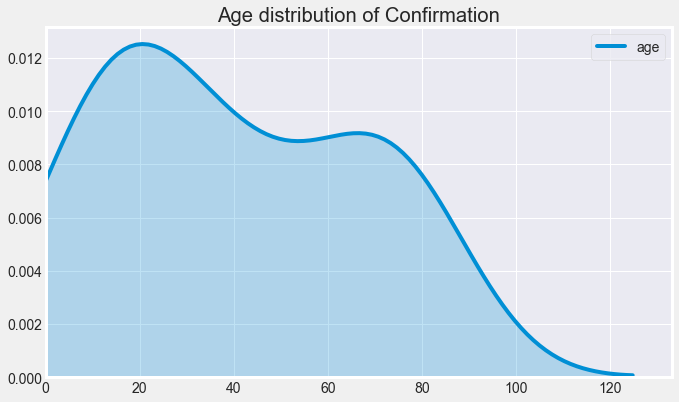

In [31]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True).set(xlim=(0))

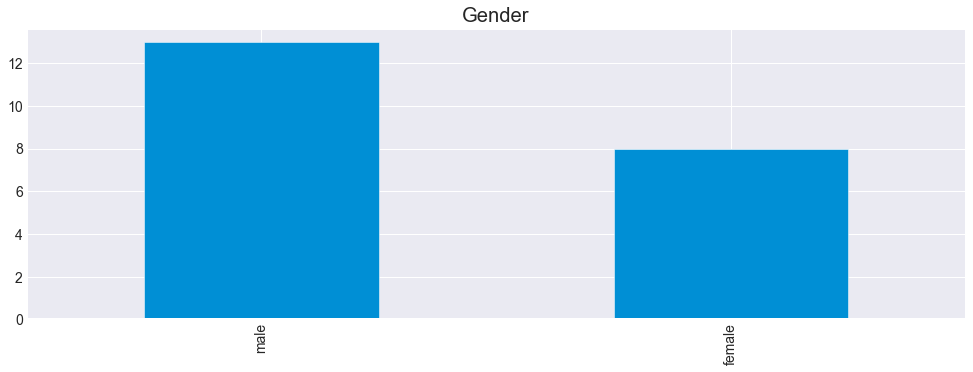

In [32]:
plt.figure(figsize=(15, 5))
plt.title('Gender')
an_data.sex.value_counts().plot.bar();

In [33]:
fig = px.pie( values=an_data.groupby(['sex']).size().values,names=an_data.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

In [34]:
male_dead = an_data[an_data.sex=='male']
female_dead = an_data[an_data.sex=='female']

[(0, 163.9277045948024)]

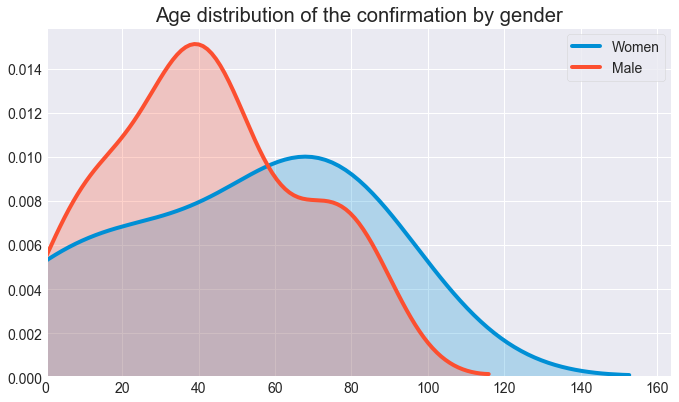

In [35]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the confirmation by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True).set(xlim=(0))
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True).set(xlim=(0))

In [36]:
fig = px.choropleth(c_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

fig = px.choropleth(e_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(mers_cntry, locations="Country", locationmode='country names',
                    color="Confirmed", hover_name="Country", 
                    color_continuous_scale='Sunsetdark', title='MERS')
fig.update(layout_coloraxis_showscale=False)
fig.show()


In [37]:
fig = px.choropleth(c_lat_grp[c_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp[e_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [38]:
fig = px.treemap(c_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='COVID-19',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(e_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='EBOLA',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(s_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='SARS',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(mers_cntry, 
                 path=["Country"], values="Confirmed", title='MERS',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [39]:
c_cases = sum(c_lat_grp['Cases'])
c_deaths = sum(c_lat_grp['Deaths'])
c_no_countries = len(c_lat_grp['Country'].value_counts())

s_cases = sum(s_lat_grp['Cases'])
s_deaths = sum(s_lat_grp['Deaths'])
s_no_countries = len(s_lat_grp['Country'].value_counts())

e_cases = sum(e_lat_grp['Cases'])
e_deaths = sum(e_lat_grp['Deaths'])
e_no_countries = len(e_lat_grp['Country'].value_counts())

In [40]:
pandemia = pd.DataFrame({
    'pandemia' : ['COVID-19', 'SARS', 'EBOLA', 'MERS'],
    'start_year' : [2019, 2003, 2014, 2012 ],
    'end_year' : [2020, 2004, 2016, 2017],
    'confirmed' : [c_cases, s_cases, e_cases, 2494],
    'deaths' : [c_deaths, s_deaths, e_deaths, 858],
    'no_of_countries' : [c_no_countries, s_no_countries, e_no_countries, 27]
})

pandemia['mortality'] = round((pandemia['deaths']/pandemia['confirmed'])*100, 2)
pandemia = pandemia.sort_values('end_year').reset_index(drop=True)
pandemia.head()

pandemia  start_year  end_year  confirmed  deaths  no_of_countries  \
0      SARS        2003      2004       8432     813               31   
1     EBOLA        2014      2016      28642   11319               10   
2      MERS        2012      2017       2494     858               27   
3  COVID-19        2019      2020    2152643  143800              185   

   mortality  
0       9.64  
1      39.52  
2      34.40  
3       6.68

In [41]:
s = '#442288'
h = '#6CA2EA'
e = '#B5D33D'
m = '#FED23F'
c = '#EB7D5B'
shemc = [s, h, e, m, c]
sec = [s, e, c]

In [42]:
fig = px.bar(pandemia.sort_values('confirmed',ascending=False), 
             x="confirmed", y="pandemia", color='pandemia', 
             text='confirmed', orientation='h', title='No. of Cases',
             color_discrete_sequence = [c, e, s, m])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

fig = px.bar(pandemia.sort_values('deaths',ascending=False), 
             x="deaths", y="pandemia", color='pandemia', 
             text='deaths', orientation='h', title='No. of Deaths',
             color_discrete_sequence = [ e, c, m, s])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

fig = px.bar(pandemia.sort_values('mortality',ascending=False),
             x="mortality", y="pandemia", color='pandemia', 
             text='mortality', orientation='h', title='Moratlity rate', 
             range_x=[0,100],
             color_discrete_sequence = [ m, s, c, h])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

fig = px.bar(pandemia.sort_values('no_of_countries', ascending=False),
             x="no_of_countries", y="pandemia", color='pandemia', 
             text='no_of_countries', orientation='h', title='No. of Countries', 
             range_x=[0,200],
             color_discrete_sequence = [ c, s, m, e])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [43]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)


In [44]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [45]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [46]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [47]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False)

In [48]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 633160.0617568655
MSE: 501747514585.62054


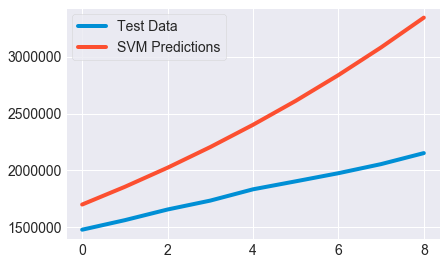

In [49]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [50]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [51]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 231761.7934306955
MSE: 69326158151.29694


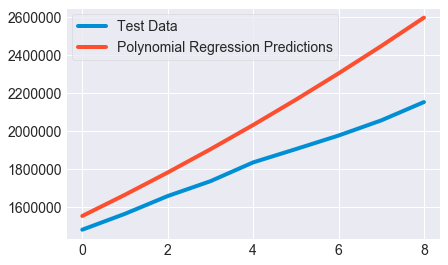

In [52]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

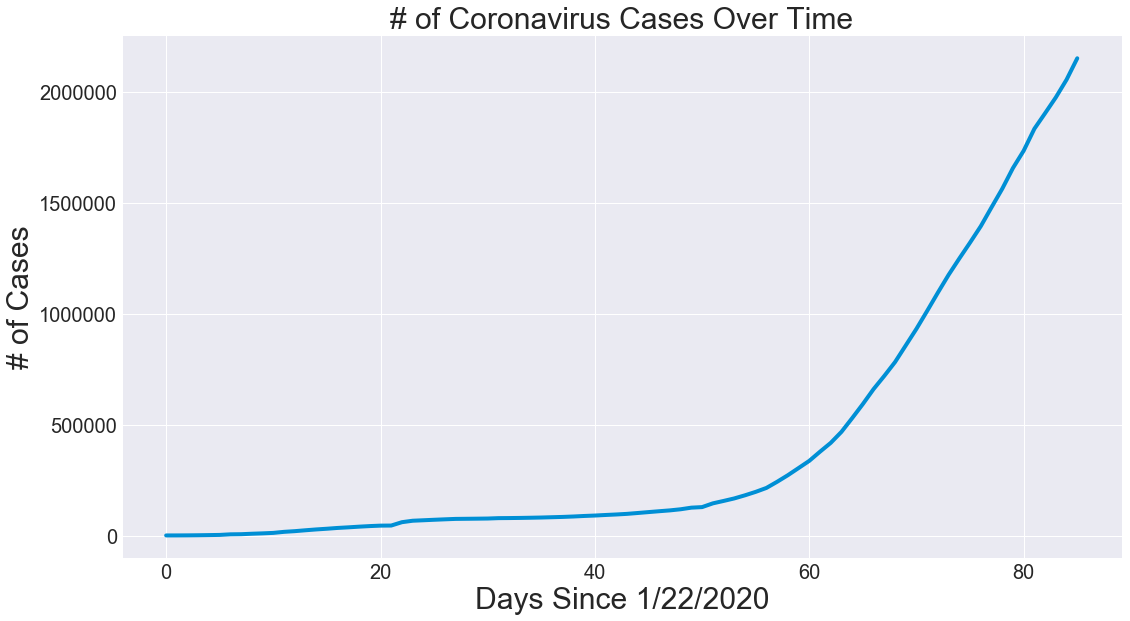

In [53]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

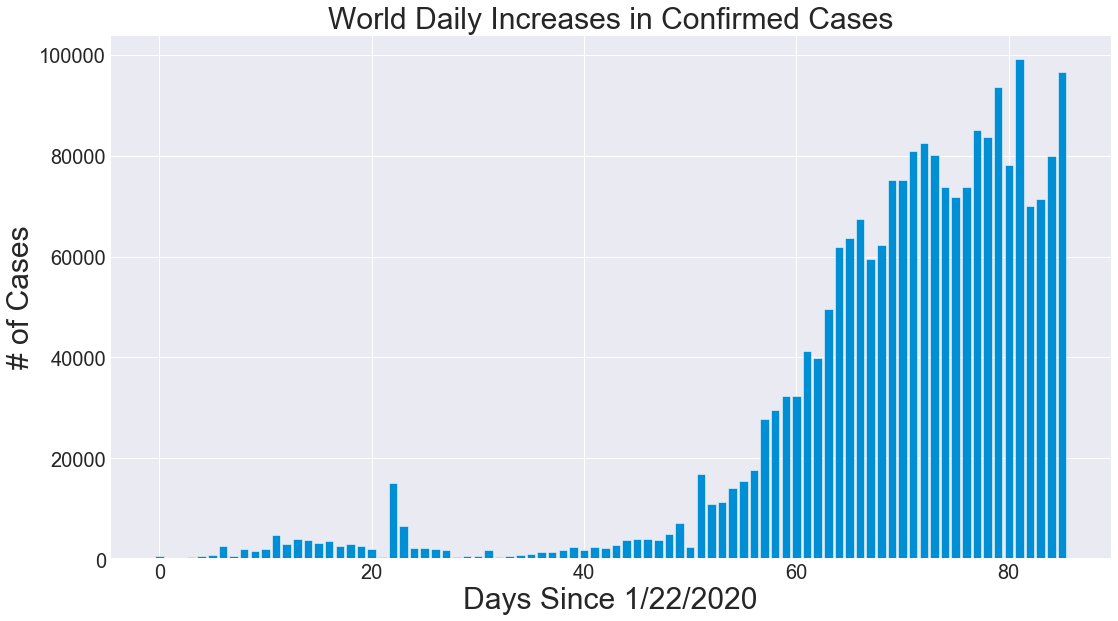

In [54]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

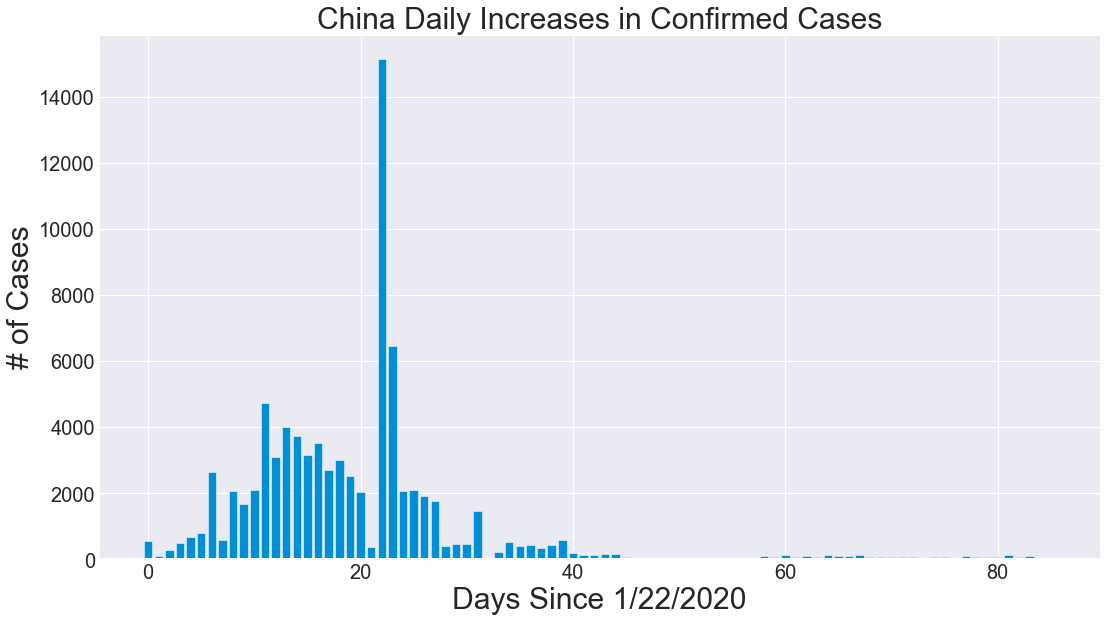

In [55]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

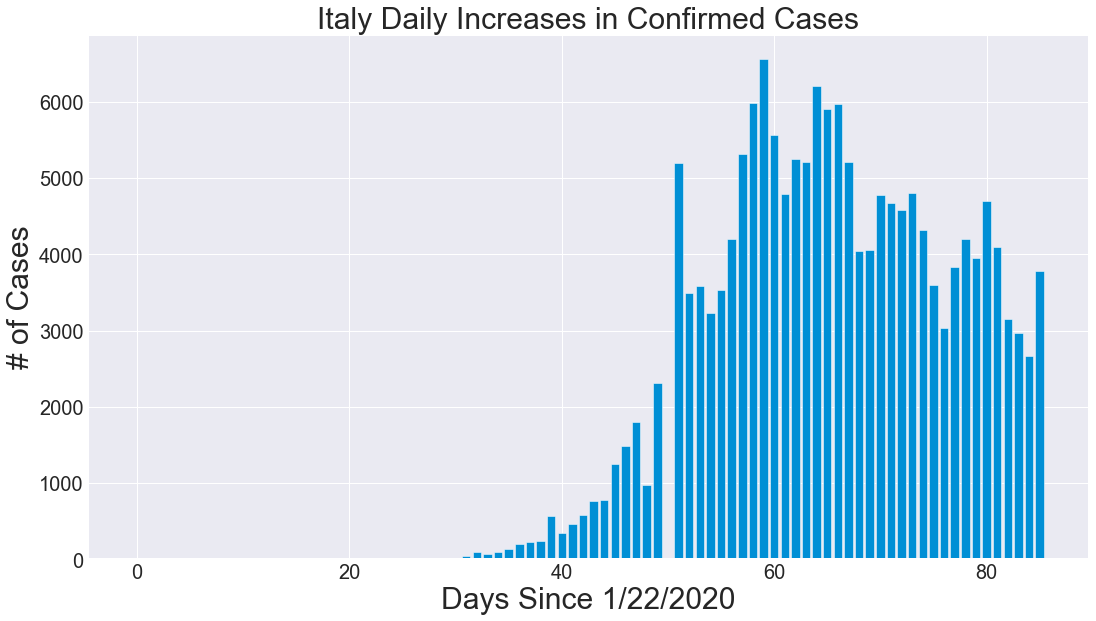

In [56]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

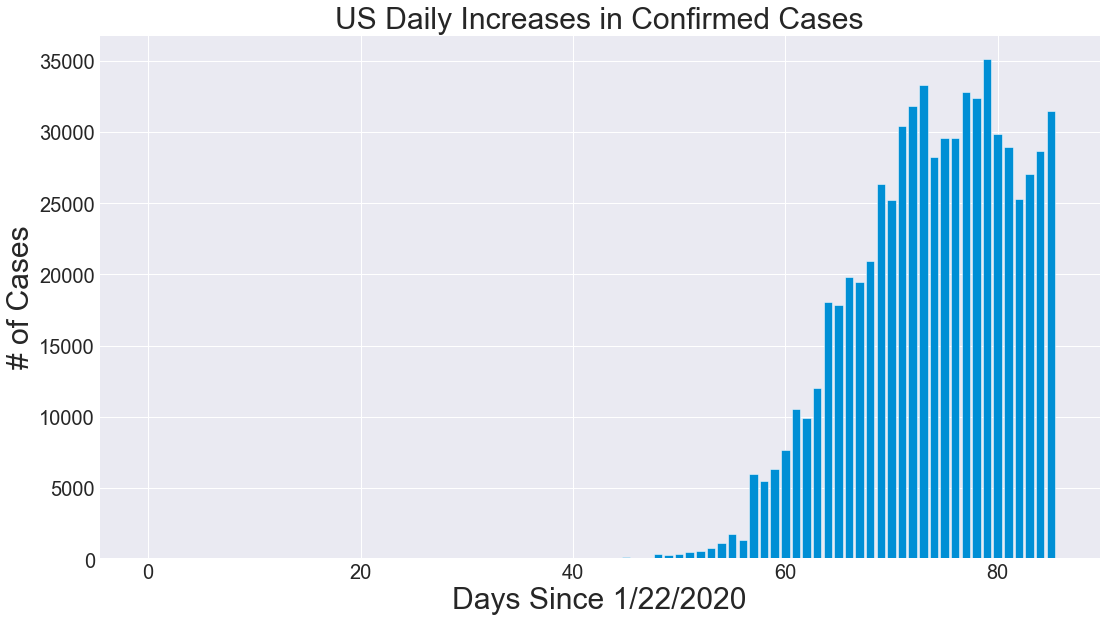

In [57]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

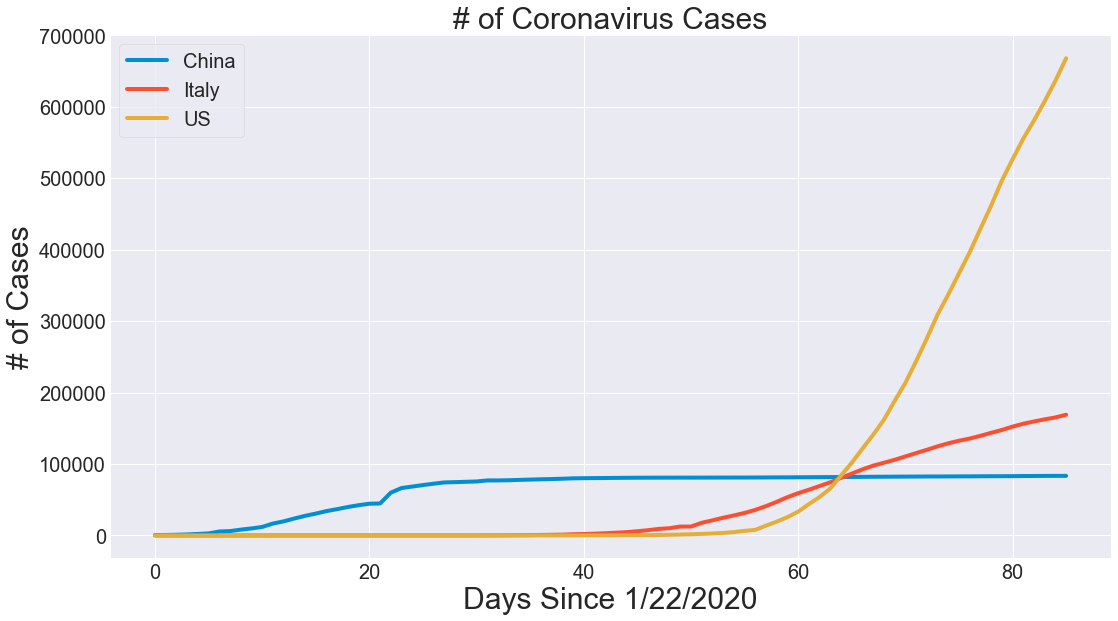

In [58]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

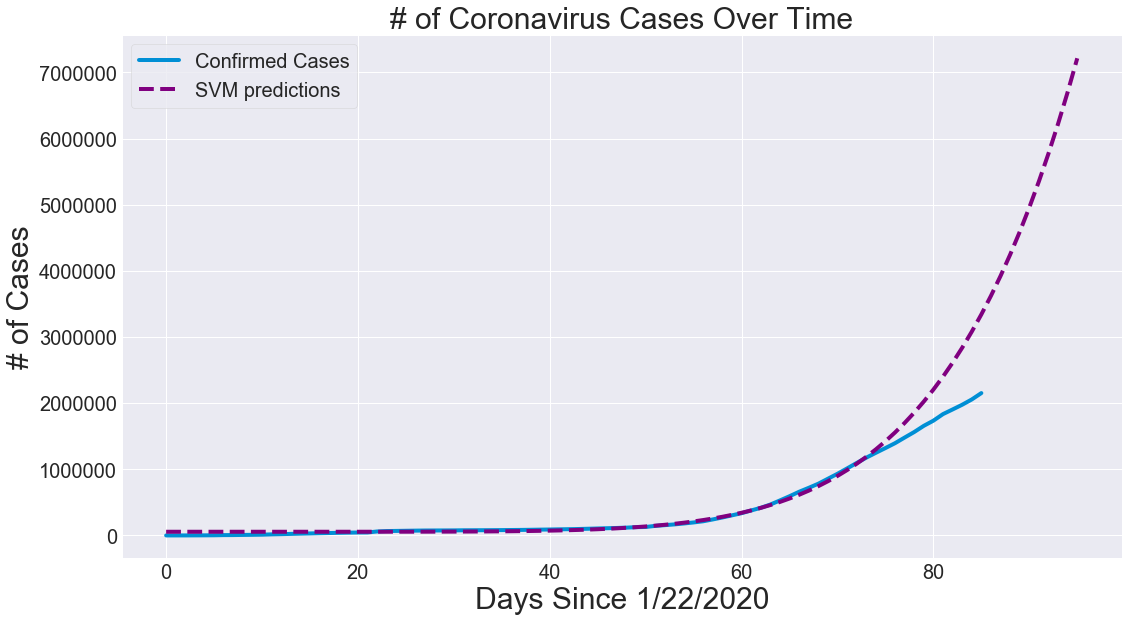

In [59]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

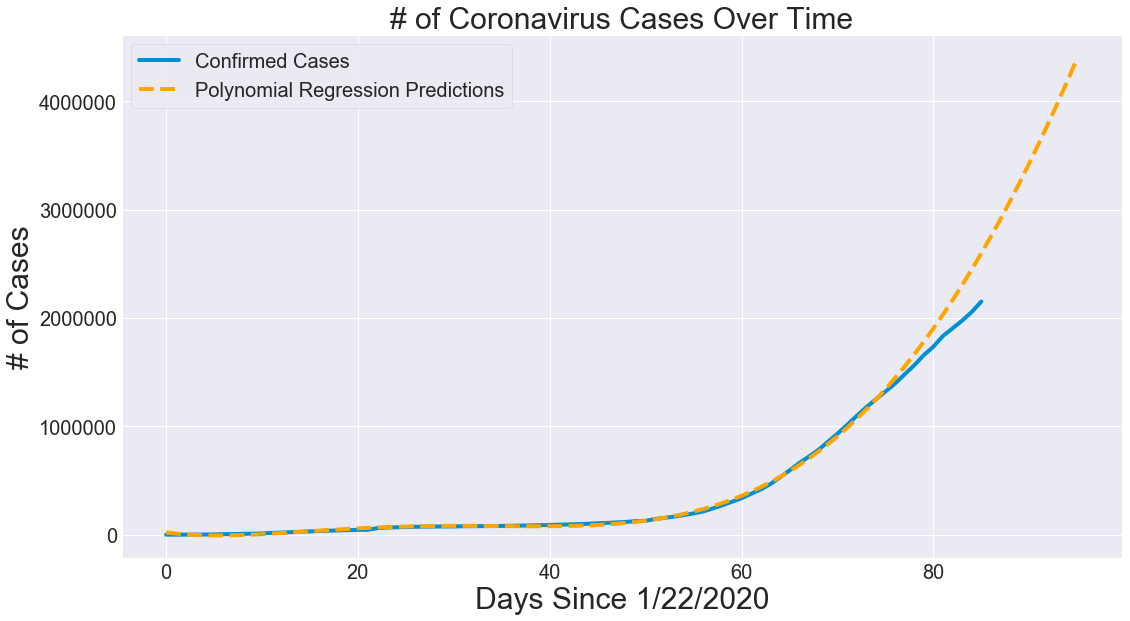

In [60]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [61]:

# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('04/17/2020', 3622217.0),
 ('04/18/2020', 3922788.0),
 ('04/19/2020', 4244818.0),
 ('04/20/2020', 4589569.0),
 ('04/21/2020', 4958363.0),
 ('04/22/2020', 5352580.0),
 ('04/23/2020', 5773664.0),
 ('04/24/2020', 6223124.0),
 ('04/25/2020', 6702536.0),
 ('04/26/2020', 7213545.0)}

In [62]:
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('04/17/2020', 2752661.0),
 ('04/18/2020', 2913417.0),
 ('04/19/2020', 3079719.0),
 ('04/20/2020', 3251560.0),
 ('04/21/2020', 3428921.0),
 ('04/22/2020', 3611775.0),
 ('04/23/2020', 3800085.0),
 ('04/24/2020', 3993801.0),
 ('04/25/2020', 4192865.0),
 ('04/26/2020', 4397207.0)}

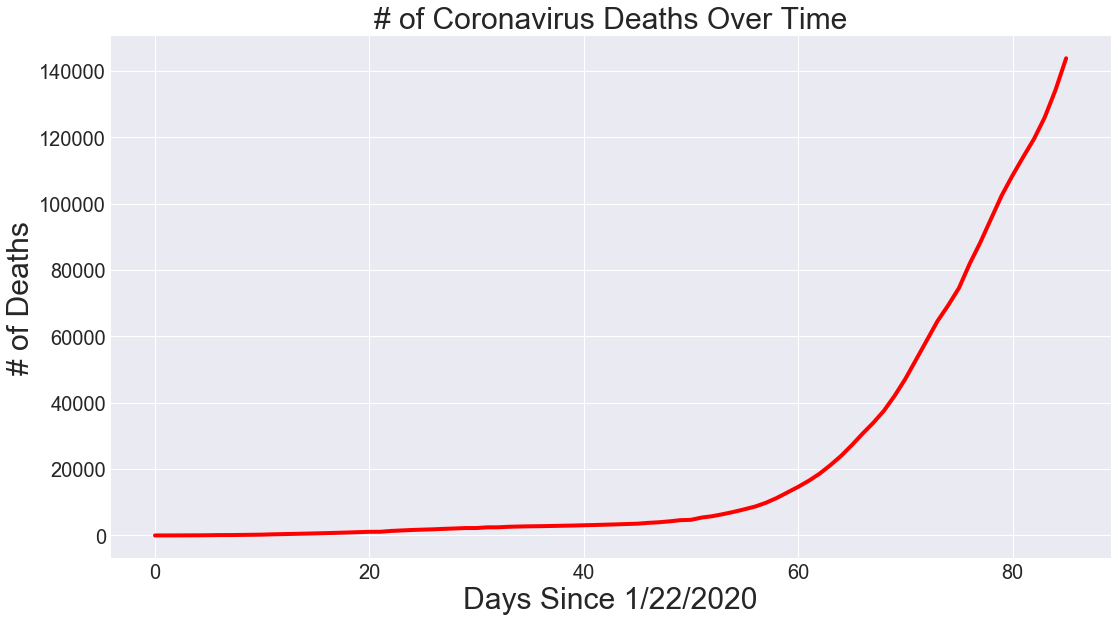

In [63]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

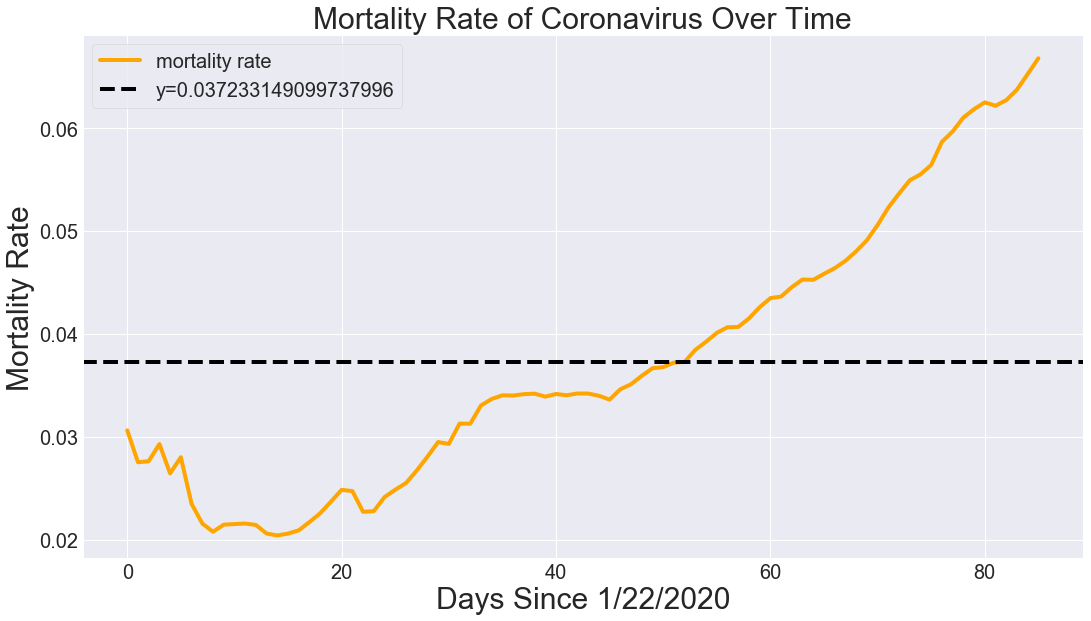

In [64]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

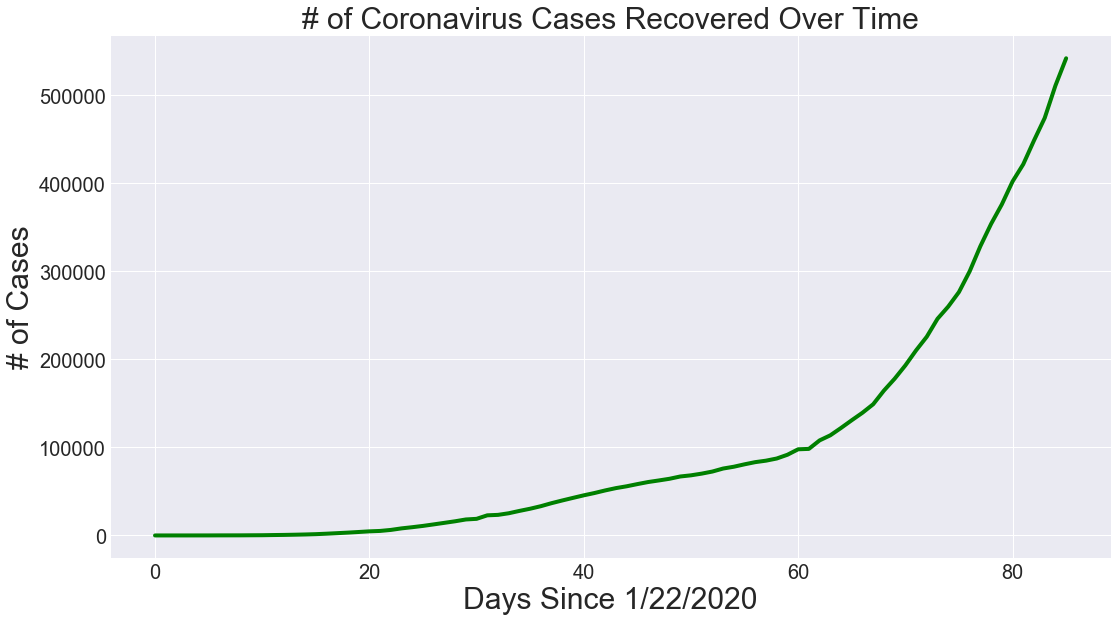

In [65]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

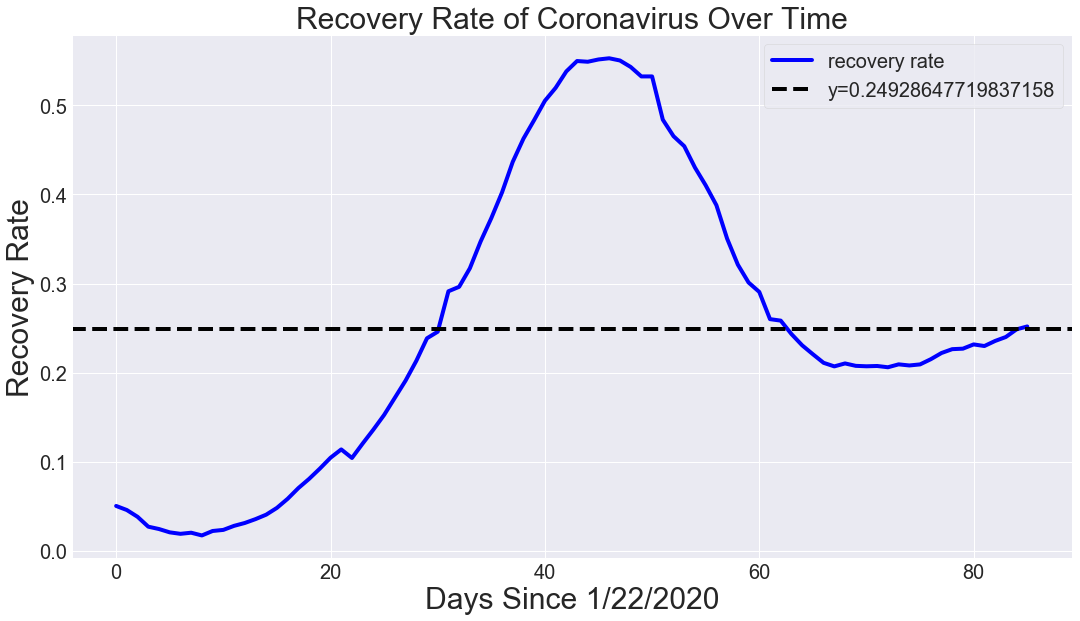

In [66]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

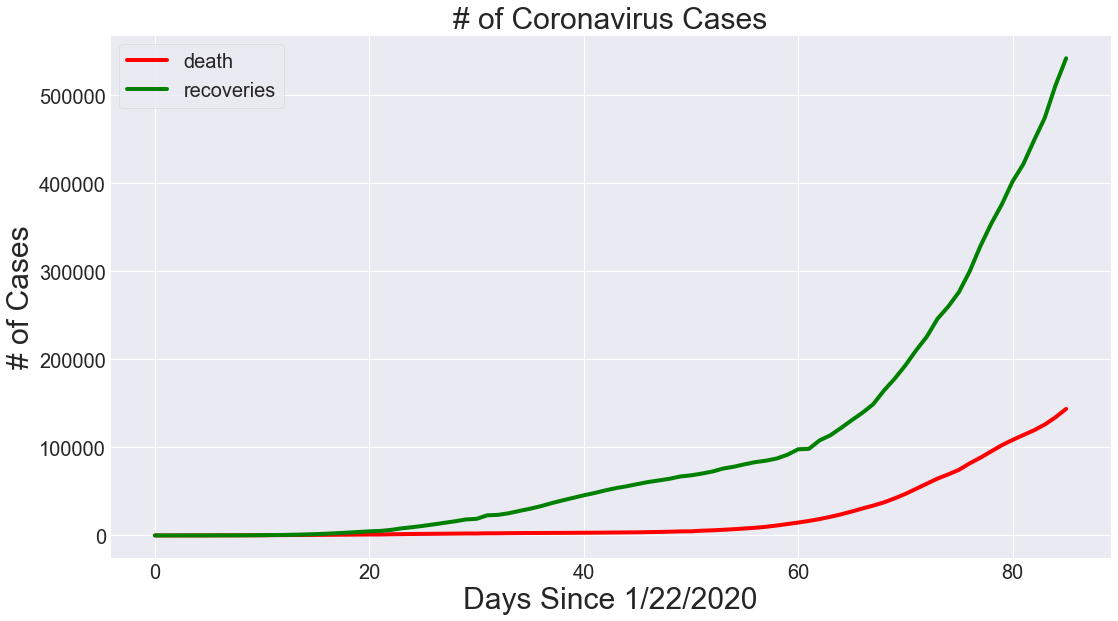

In [67]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [68]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [69]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [70]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

In [71]:

# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

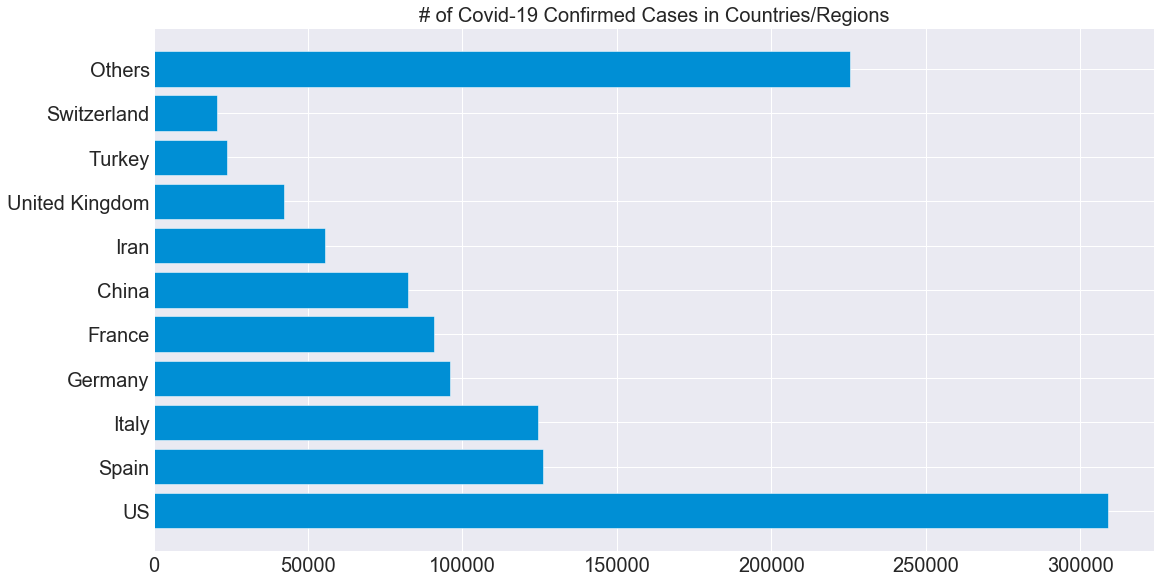

In [72]:
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [73]:
# removing county wise data to avoid double counting

full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

In [74]:
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

In [75]:
full_table.to_csv('covid_19_clean_completes.csv', index=False)

In [76]:
full_table

Province/State         Country/Region        Lat       Long  \
0                            NaN            Afghanistan  33.000000  65.000000   
1                            NaN                Albania  41.153300  20.168300   
2                            NaN                Algeria  28.033900   1.659600   
3                            NaN                Andorra  42.506300   1.521800   
4                            NaN                 Angola -11.202700  17.873900   
...                          ...                    ...        ...        ...   
22699  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
22700                        NaN            South Sudan   6.877000  31.307000   
22701                        NaN         Western Sahara  24.215500 -12.885800   
22702                        NaN  Sao Tome and Principe   0.186360   6.613081   
22703                        NaN                  Yemen  15.552727  48.516388   

          Date  Confirmed  Deaths  Recovered  
0      1/22/20          0       0        0.0  
1      1/22/20          0       0        0.0  
2      1/22/20          0       0        0.0  
3      1/22/20          0       0        0.0  
4      1/22/20          0       0        0.0  
...        ...        ...     ...        ...  
22699  4/16/20          1       0        NaN  
22700  4/16/20          4       0        NaN  
22701  4/16/20          6       0        NaN  
22702  4/16/20          4       0        NaN  
22703  4/16/20          1       0        NaN  

[22618 rows x 8 columns]

In [77]:
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(full_latest)):
    folium.Circle(
        location=[full_latest.iloc[i]['Lat'], full_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(full_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(full_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(full_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(full_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(full_latest.iloc[i]['Recovered']),
        radius=int(full_latest.iloc[i]['Confirmed'])**1.1).add_to(m)
m
#Across the world

In [78]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [79]:
data


Unnamed: 0                 date state  region_code                 region  \
0            0  2020-04-15T17:00:00   ITA           13                Abruzzo   
1            1  2020-04-15T17:00:00   ITA           17             Basilicata   
2            2  2020-04-15T17:00:00   ITA            4           P.A. Bolzano   
3            3  2020-04-15T17:00:00   ITA           18               Calabria   
4            4  2020-04-15T17:00:00   ITA           15               Campania   
5            5  2020-04-15T17:00:00   ITA            8         Emilia-Romagna   
6            6  2020-04-15T17:00:00   ITA            6  Friuli Venezia Giulia   
7            7  2020-04-15T17:00:00   ITA           12                  Lazio   
8            8  2020-04-15T17:00:00   ITA            7                Liguria   
9            9  2020-04-15T17:00:00   ITA            3              Lombardia   
10          10  2020-04-15T17:00:00   ITA           11                 Marche   
11          11  2020-04-15T17:00:00   ITA           14                 Molise   
12          12  2020-04-15T17:00:00   ITA            1               Piemonte   
13          13  2020-04-15T17:00:00   ITA           16                 Puglia   
14          14  2020-04-15T17:00:00   ITA           20               Sardegna   
15          15  2020-04-15T17:00:00   ITA           19                Sicilia   
16          16  2020-04-15T17:00:00   ITA            9                Toscana   
17          17  2020-04-15T17:00:00   ITA            4            P.A. Trento   
18          18  2020-04-15T17:00:00   ITA           10                 Umbria   
19          19  2020-04-15T17:00:00   ITA            2          Valle d'Aosta   
20          20  2020-04-15T17:00:00   ITA            5                 Veneto   

          lat       long  hospitalized_with_symptoms  intensive_care  \
0   42.351222  13.398438                         341              44   
1   40.639471  15.805148                          60              12   
2   46.499335  11.356624                         166              32   
3   38.905976  16.594402                         156              11   
4   40.839566  14.250850                         607              86   
5   44.494367  11.341721                        3388             325   
6   45.649435  13.768136                         163              24   
7   41.892770  12.483667                        1342             196   
8   44.411493   8.932699                         959             120   
9   45.466794   9.190347                       12043            1074   
10  43.616760  13.518875                         888             106   
11  41.557748  14.659161                          27               4   
12  45.073274   7.680687                        3338             366   
13  41.125596  16.867367                         592              73   
14  39.215312   9.110616                         107              26   
15  38.115697  13.362357                         541              49   
16  43.769231  11.255889                         977             216   
17  46.068935  11.121231                         312              48   
18  43.106758  12.388247                         122              37   
19  45.737503   7.320149                         112              11   
20  45.434905  12.338452                        1402             219   

    total_hospitalized  home_quarantine  total_confirmed_cases  \
0                  385             1425                   1810   
1                   72              189                    261   
2                  198             1378                   1576   
3                  167              652                    819   
4                  693             2394                   3087   
5                 3713             9864                  13577   
6                  187             1207                   1394   
7                 1538             2509                   4047   
8                 1079             2385   

In [80]:
data.isna().sum()

Unnamed: 0                     0
date                           0
state                          0
region_code                    0
region                         0
lat                            0
long                           0
hospitalized_with_symptoms     0
intensive_care                 0
total_hospitalized             0
home_quarantine                0
total_confirmed_cases          0
variation_total_confirmed      0
new_confirmed_cases            0
recovered                      0
deaths                         0
total_cases                    0
swabs_made                     0
note_it                       20
note_en                       20
dtype: int64

In [81]:
data.shape

(21, 20)

In [82]:
clus=data.loc[:,['Unnamed: 0','lat','long']]
clus.head()

Unnamed: 0        lat       long
0           0  42.351222  13.398438
1           1  40.639471  15.805148
2           2  46.499335  11.356624
3           3  38.905976  16.594402
4           4  40.839566  14.250850

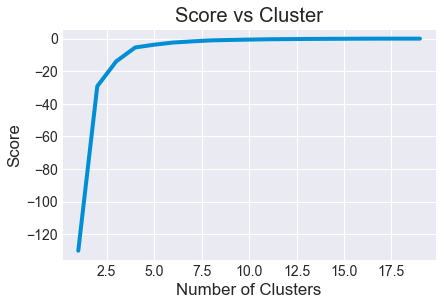

In [83]:
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['lat']]
X_axis = data[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Score vs Cluster')
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label'] = kmeans.fit_predict(clus[clus.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(clus[clus.columns[1:3]])

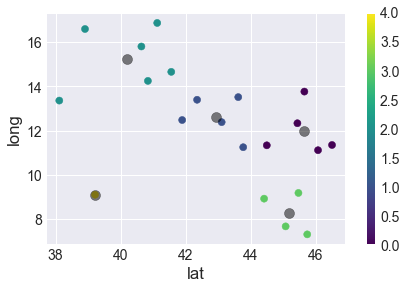

In [85]:
clus.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [86]:
m = folium.Map(location=[42.8719,12.5674], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=5)

for i in range(0, len(data)):
    folium.Circle(
        location=[data.iloc[i]['lat'], data.iloc[i]['long']],
        color='crimson', 
        tooltip =   '<li><bold>Region : '+str(data.iloc[i]['region'])+
                    '<li><bold>Total cases : '+str(data.iloc[i]['total_cases'])+
                    '<li><bold>Recovered : '+str(data.iloc[i]['recovered'])+
                    '<li><bold>Deaths : '+str(data.iloc[i]['deaths'])+
                    '<li><bold>Total Hospitalized : '+str(data.iloc[i]['total_hospitalized']),
        radius=int(data.iloc[i]['total_cases'])**1.1).add_to(m)
m

In [87]:
data['date'] = pd.to_datetime(data['date']).dt.normalize()
daily = data.sort_values(['date','region'])
latest = data[data.date == daily.date.max()]
latest.head()

Unnamed: 0       date state  region_code        region        lat  \
0           0 2020-04-15   ITA           13       Abruzzo  42.351222   
1           1 2020-04-15   ITA           17    Basilicata  40.639471   
2           2 2020-04-15   ITA            4  P.A. Bolzano  46.499335   
3           3 2020-04-15   ITA           18      Calabria  38.905976   
4           4 2020-04-15   ITA           15      Campania  40.839566   

        long  hospitalized_with_symptoms  intensive_care  total_hospitalized  \
0  13.398438                         341              44                 385   
1  15.805148                          60              12                  72   
2  11.356624                         166              32                 198   
3  16.594402                         156              11                 167   
4  14.250850                         607              86                 693   

   home_quarantine  total_confirmed_cases  variation_total_confirmed  \
0             1425                   1810                         10   
1              189                    261                         -4   
2             1378                   1576                         12   
3              652                    819                          3   
4             2394                   3087                         -7   

   new_confirmed_cases  recovered  deaths  total_cases  swabs_made note_it  \
0                   29        224     240         2274       22500     NaN   
1                    1         38      21          320        5037     NaN   
2                   40        425     223         2224       25370     NaN   
3                   15         81      71          971       19662     NaN   
4                   38        442     278         3807       39534     NaN   

  note_en  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [88]:
data_groupby_region = latest.groupby("region")[['total_cases', 'deaths', 'recovered','hospitalized_with_symptoms','total_hospitalized']].sum().reset_index()
dgr = data_groupby_region 
dgr.head()

region  total_cases  deaths  recovered  hospitalized_with_symptoms  \
0         Abruzzo         2274     240        224                         341   
1      Basilicata          320      21         38                          60   
2        Calabria          971      71         81                         156   
3        Campania         3807     278        442                         607   
4  Emilia-Romagna        21029    2788       4664                        3388   

   total_hospitalized  
0                 385  
1                  72  
2                 167  
3                 693  
4                3713

In [89]:
dgr.describe().T

count         mean           std    min     25%  \
total_cases                  21.0  7864.523810  13724.630813  263.0  1322.0   
deaths                       21.0  1030.714286   2469.142040   15.0   121.0   
recovered                    21.0  1813.904762   3862.996362   38.0   273.0   
hospitalized_with_symptoms   21.0  1316.333333   2636.697202   27.0   156.0   
total_hospitalized           21.0  1462.952381   2871.412257   31.0   167.0   

                               50%     75%      max  
total_cases                 3184.0  5936.0  62153.0  
deaths                       278.0   746.0  11377.0  
recovered                    686.0  1660.0  17855.0  
hospitalized_with_symptoms   541.0   977.0  12043.0  
total_hospitalized           590.0  1193.0  13117.0

In [90]:

fig = px.bar(dgr[['region', 'total_cases']].sort_values('total_cases', ascending=False), 
             y="total_cases", x="region", color='region', 
             log_y=True, template='ggplot2', title='Confirmed Cases vs Region')
fig.show()

In [91]:
fig = px.bar(dgr[['region', 'total_hospitalized']].sort_values('total_hospitalized', ascending=False), 
             y="total_hospitalized", x="region", color='region', 
             log_y=True, template='ggplot2', title='Hospitalised Patient vs Region')
fig.show()

In [92]:
fig = px.bar(dgr[['region', 'recovered']].sort_values('recovered', ascending=False), 
             y="recovered", x="region", color='region', 
             log_y=True, template='ggplot2', title='Revovery vs Region')
fig.show()

In [93]:

fig = px.bar(dgr[['region', 'deaths']].sort_values('deaths', ascending=False), 
             y="deaths", x="region", color='region', 
             log_y=True, template='ggplot2', title='Death vs Region')
fig.show()

In [94]:
dgrs_el = dgr.sort_values(by=['total_cases'],ascending = False)
dgrs_el.head()

region  total_cases  deaths  recovered  \
8        Lombardia        62153   11377      17855   
4   Emilia-Romagna        21029    2788       4664   
13        Piemonte        18229    2015       3019   
20          Veneto        14624     940       2895   
17         Toscana         7666     556        693   

    hospitalized_with_symptoms  total_hospitalized  
8                        12043               13117  
4                         3388                3713  
13                        3338                3704  
20                        1402                1621  
17                         977                1193

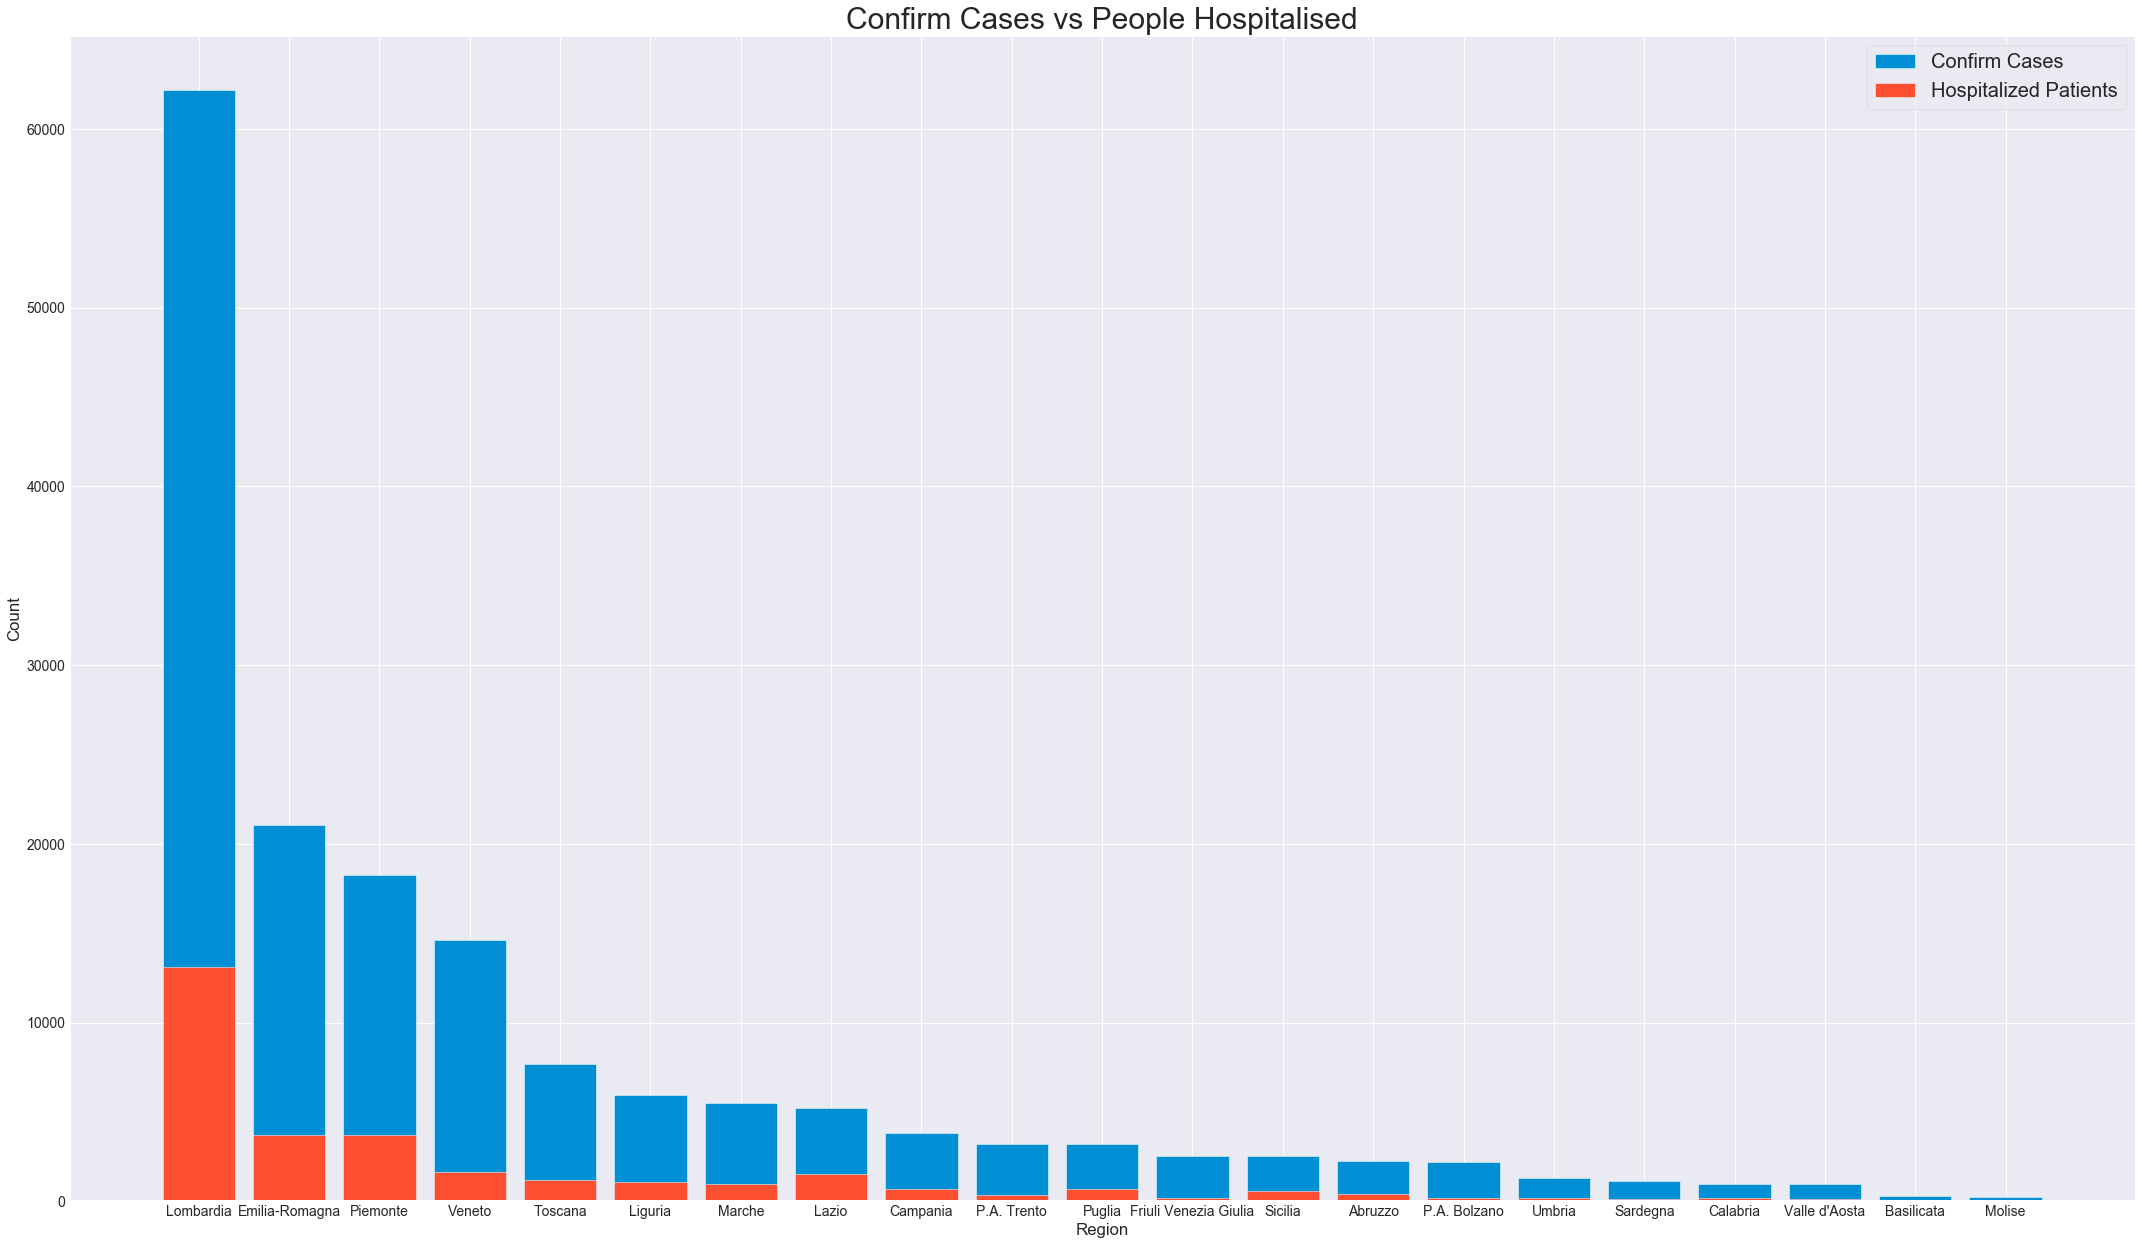

In [95]:
plt.figure(figsize=(33,20))
plt.bar(dgrs_el.region, dgrs_el.total_cases,label="Confirm Cases")
plt.bar(dgrs_el.region, dgrs_el.total_hospitalized,label="Hospitalized Patients")

plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=20)
plt.title('Confirm Cases vs People Hospitalised',fontsize= 30)
plt.show()


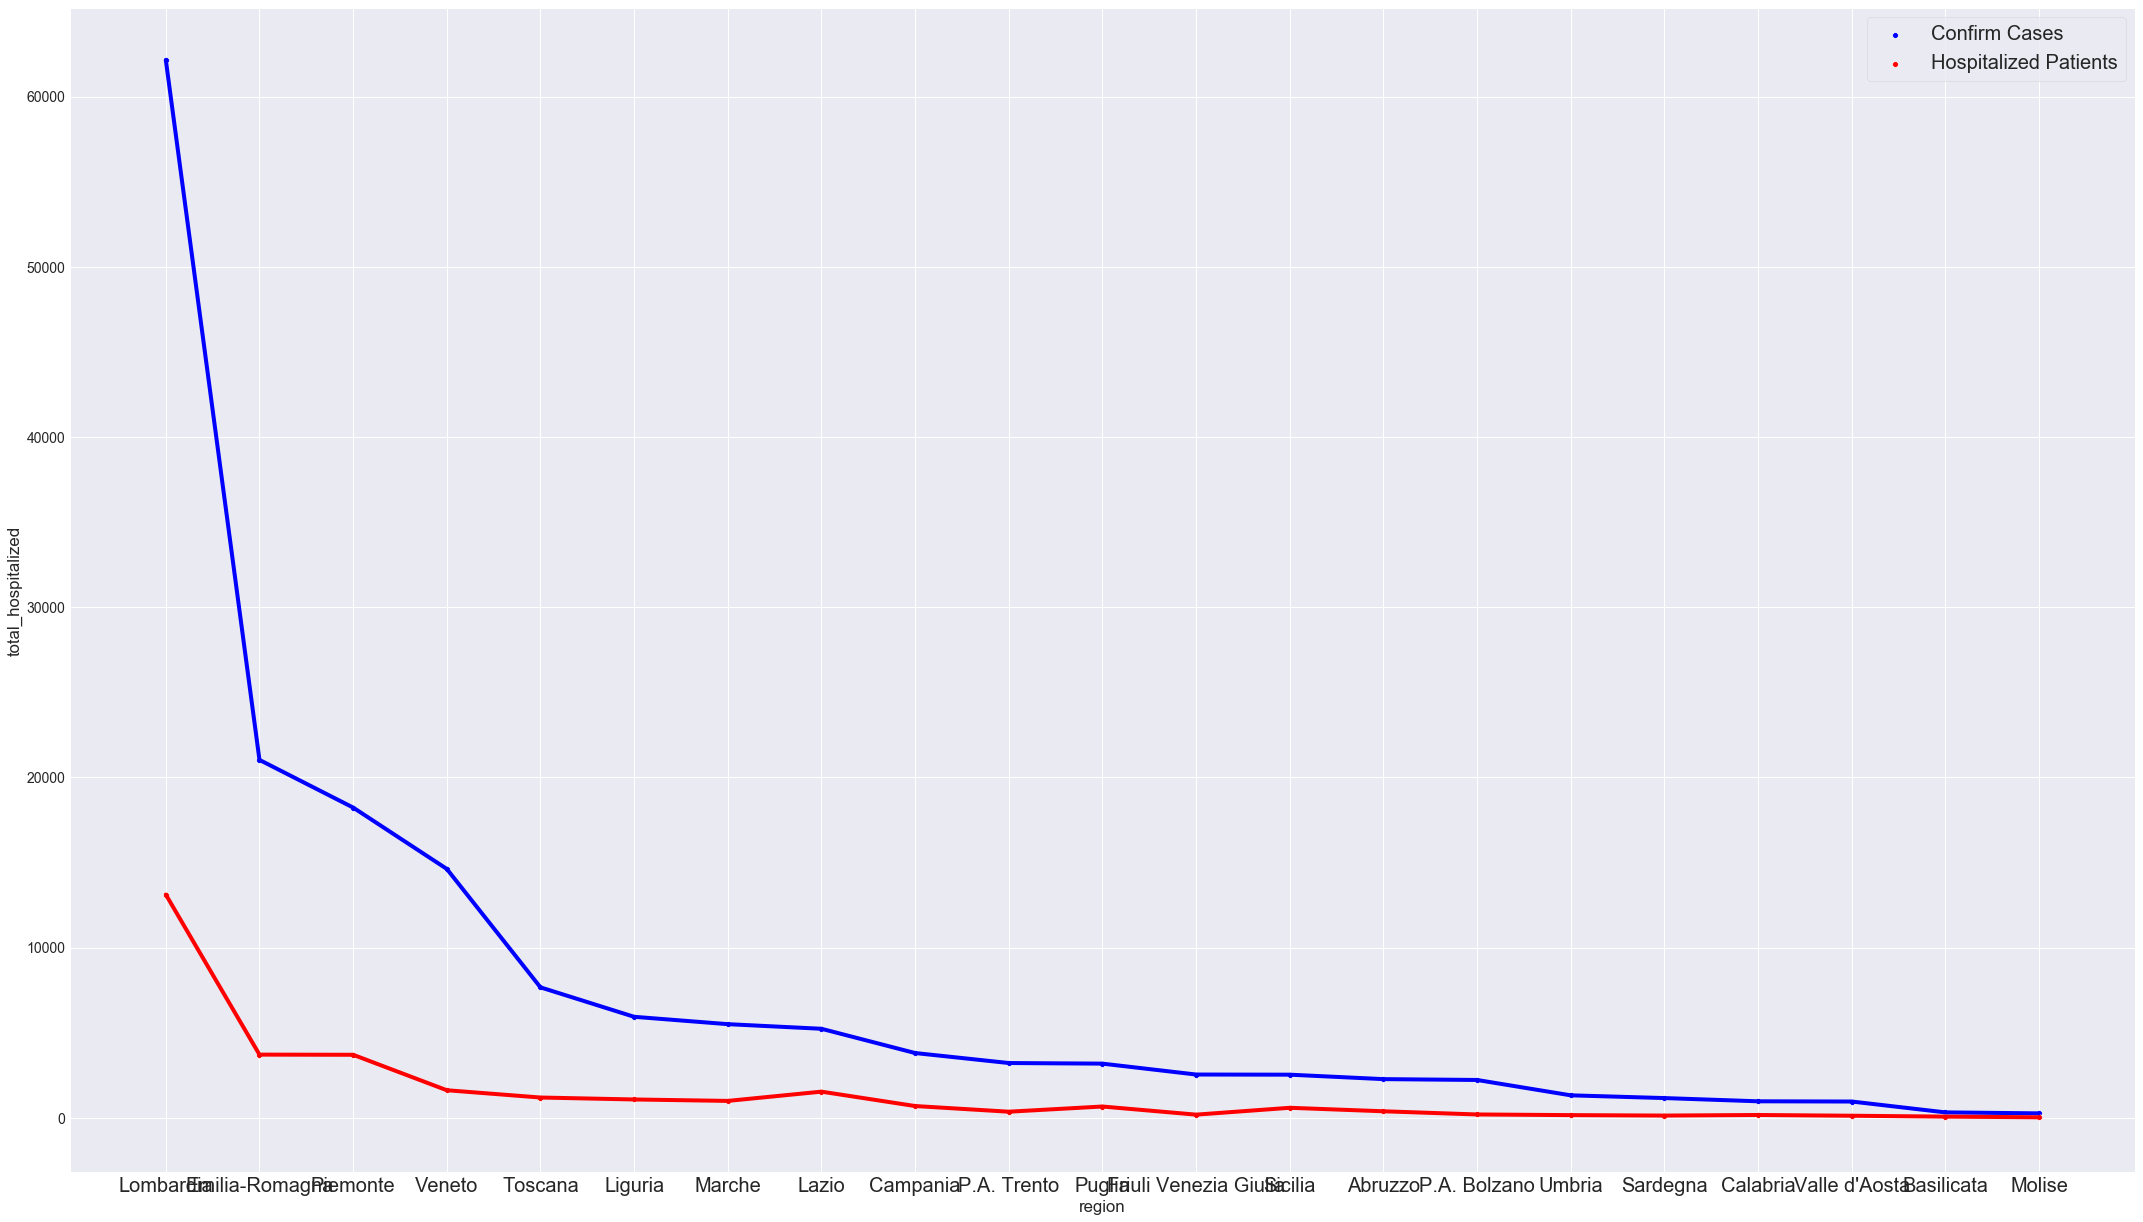

In [96]:

f, ax = plt.subplots(figsize=(33,20))

ax=sns.scatterplot(x="region", y="total_cases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax=sns.scatterplot(x="region", y="total_hospitalized", data=dgrs_el,
             color="red",label = "Hospitalized Patients")
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(frameon=True, fontsize=20)
plt.plot(dgrs_el.region,dgrs_el.total_cases,zorder=1,color="blue")
plt.plot(dgrs_el.region,dgrs_el.total_hospitalized,zorder=1,color="red")

The graph shows statistical data direct from WHO. as the data says in Lombardia after 7,000 and more confirmed cases there are only approximately 4.5K people who are hospitalised. This has become a situation of crisis in italy. Hospital condition is becoming worse day by day. According to the doctors not every patient is getting proper and equal care and that is the main cause of multi fold spread of coronavirus. The whole country is locked down. Government has announced there will be no gathering, no sporting event and no travelling across the country just because of the high number of deaths in the country

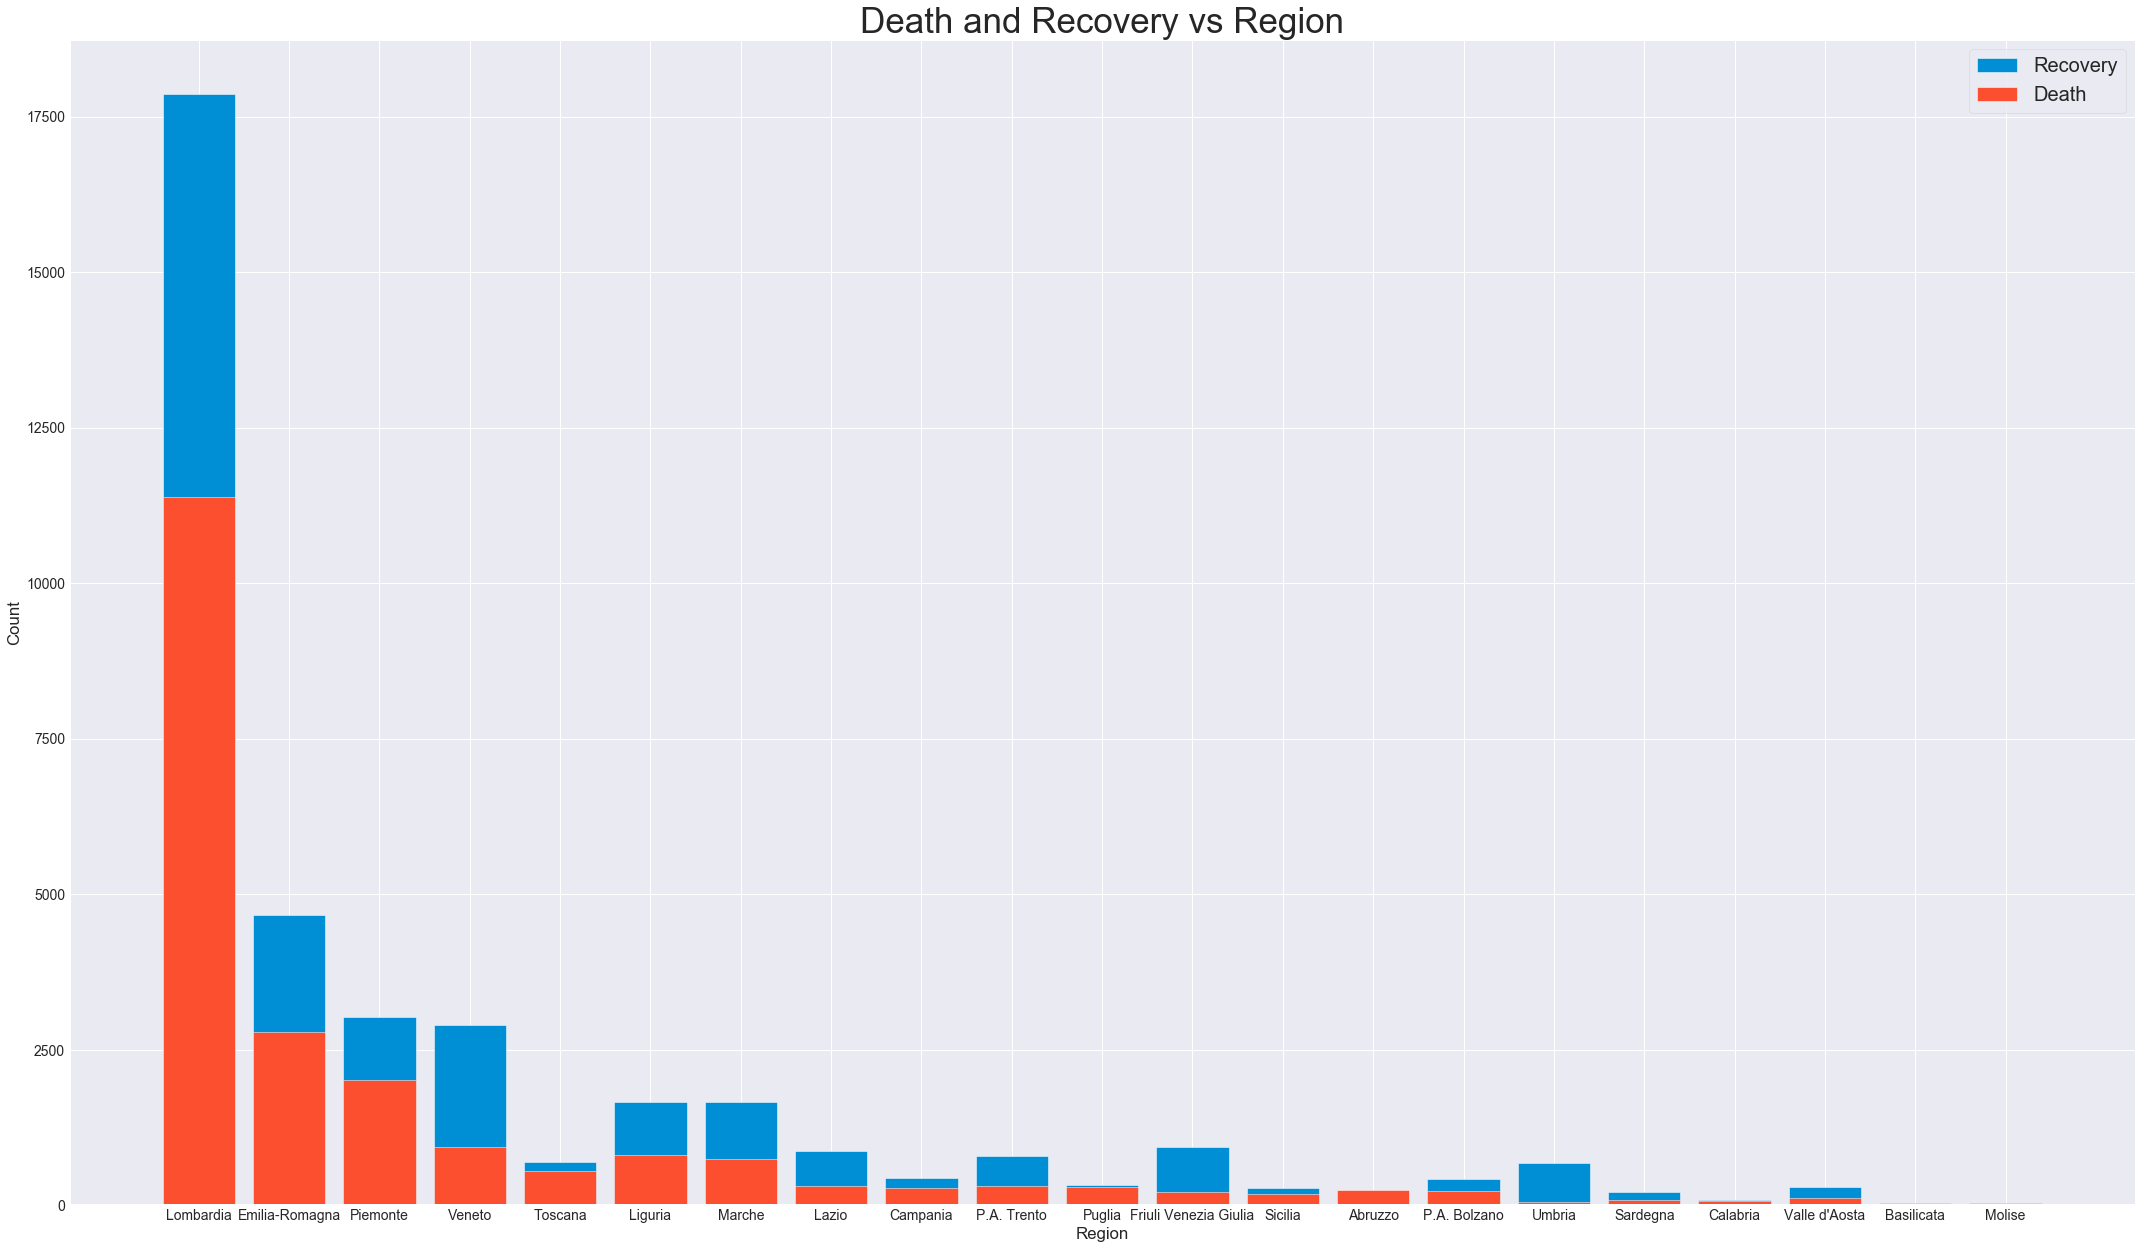

In [97]:
plt.figure(figsize=(33,20))
plt.bar(dgrs_el.region, dgrs_el.recovered,label="Recovery")
plt.bar(dgrs_el.region, dgrs_el.deaths,label="Death")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=20)
plt.title('Death and Recovery vs Region', fontsize= 35)
plt.show()


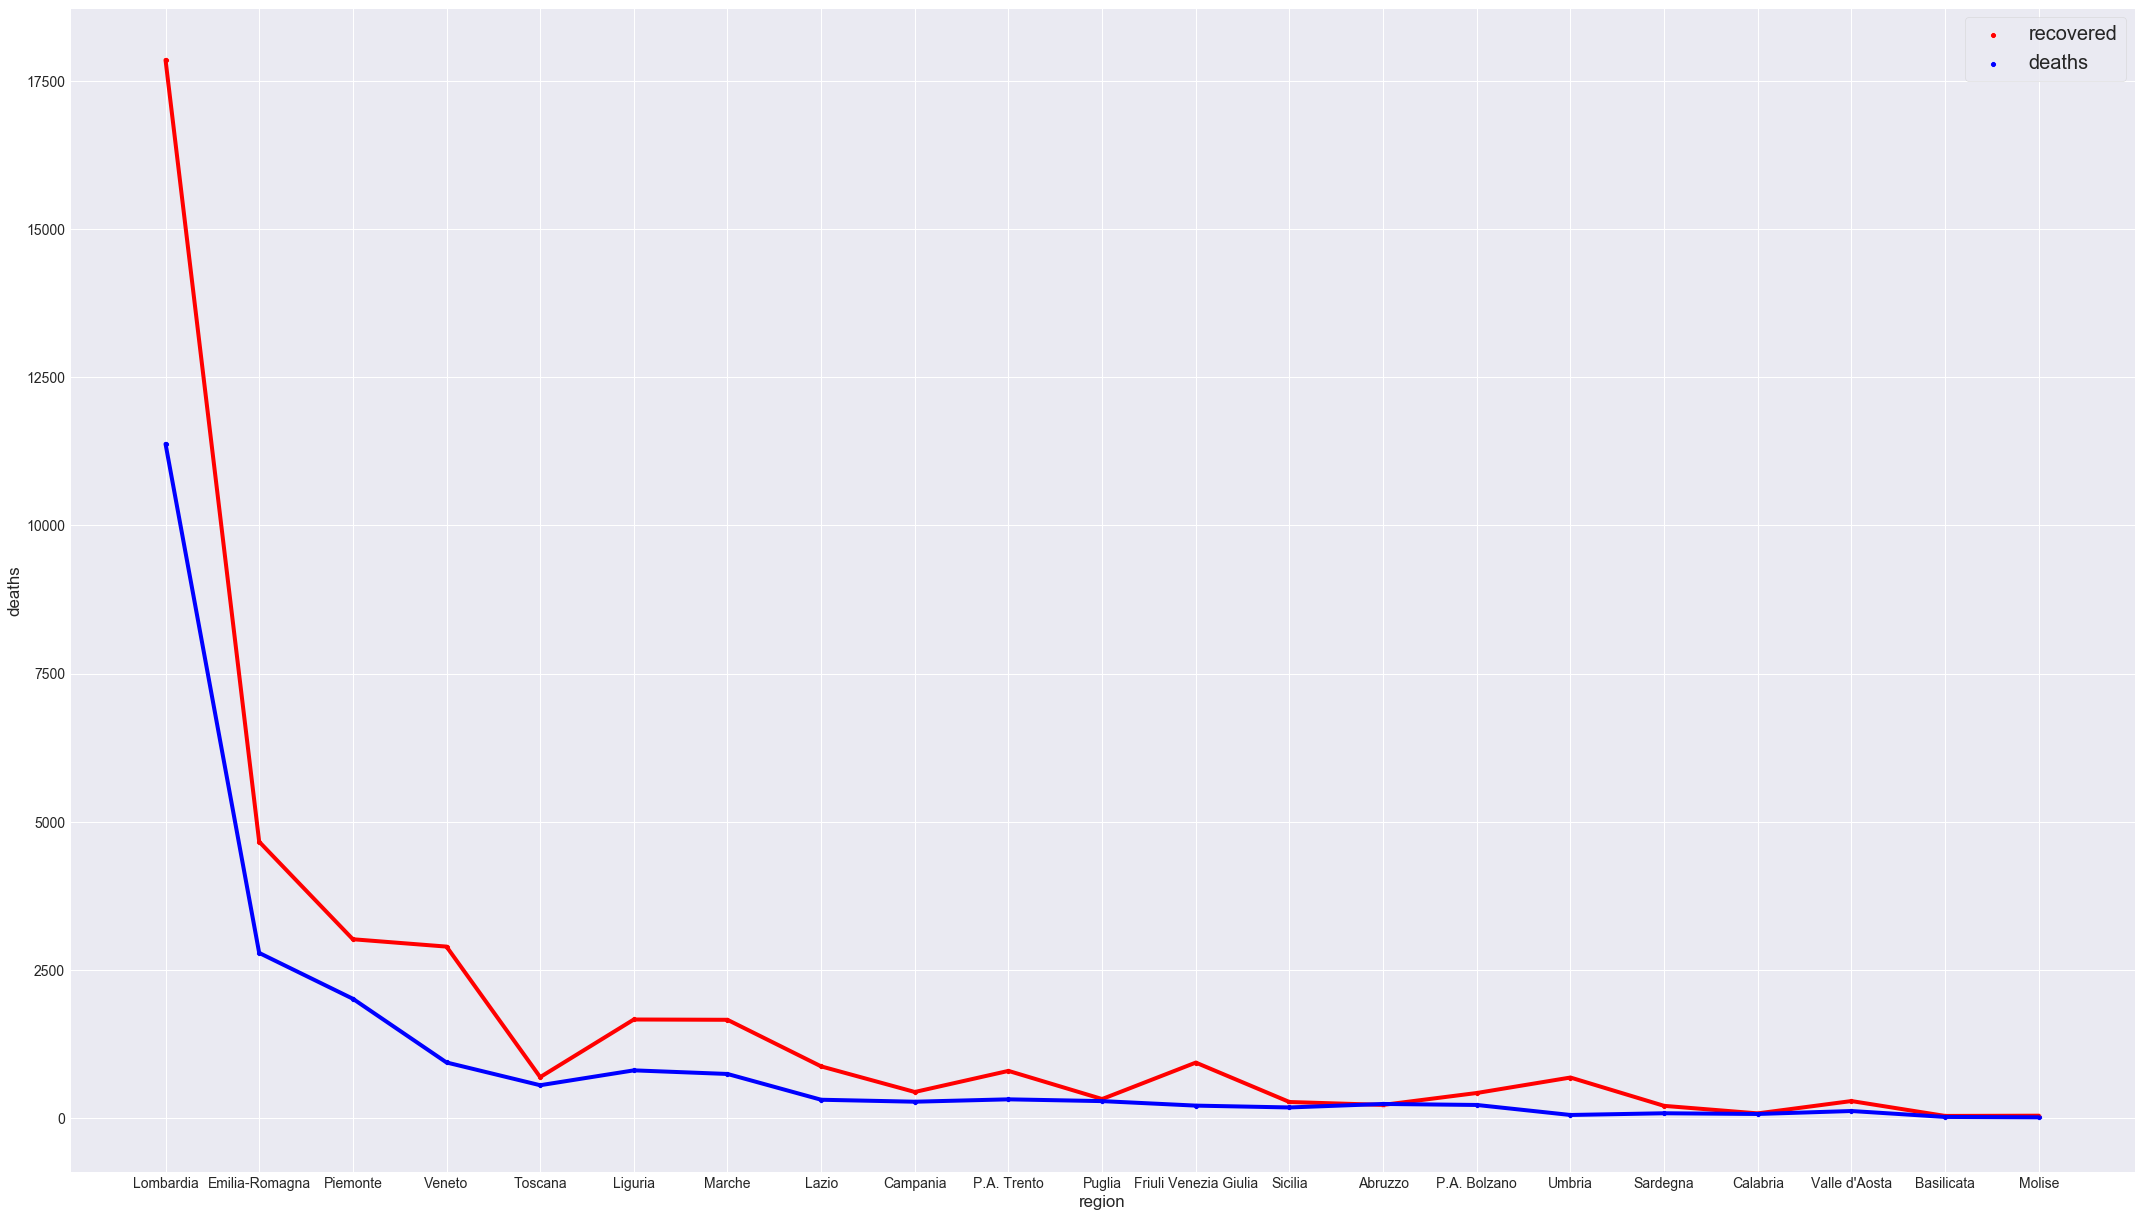

In [98]:

f, ax = plt.subplots(figsize=(33,20))
ax=sns.scatterplot(x="region", y="recovered", data=dgrs_el,
             color="red",label = "recovered")
ax=sns.scatterplot(x="region", y="deaths", data=dgrs_el,
             color="blue",label = "deaths")
plt.legend(frameon=True, fontsize=20)
plt.plot(dgrs_el.region,dgrs_el.recovered,zorder=1,color="red")
plt.plot(dgrs_el.region,dgrs_el.deaths,zorder=1,color="blue")

According to the graph recovery rate of the patient is very slow. There are some common reasons behind the rapid increase in numbers of people infected through coronavirus. According to the data, the number of hospitalized people is far less than the number of people infected through novel-Coronavirus. According to the geographical structure of Italy In Europe the cases have now been confirmed in every member nation of the European Union. Italy will remain totally locked down as its healthcare system struggles to cope, on the other hand the nearby countries like Germany and France report alarming spikes in daily cases

In [99]:
data1111=pd.read_csv("D:\datasets\covid19-ita-regions.csv")

In [100]:
data_groupby_date = latest.groupby("date")[['date','hospitalized_with_symptoms','intensive_care','total_hospitalized','home_quarantine','recovered','deaths','total_cases','swabs_made']].sum().reset_index()
data_groupby_date.head()

date  hospitalized_with_symptoms  intensive_care  total_hospitalized  \
0 2020-04-15                       27643            3079               30722   

   home_quarantine  recovered  deaths  total_cases  swabs_made  
0            74696      38092   21645       165155     1117404

In [101]:
ps_ts = float(data_groupby_date.total_cases/data_groupby_date.swabs_made)
d_ts = float(data_groupby_date.deaths/data_groupby_date.total_cases)
r_ps = float(data_groupby_date.recovered/data_groupby_date.total_cases)
d_ps = float(data_groupby_date.deaths/data_groupby_date.total_cases)

In [102]:
print("The percentage of Confirmation " + str(ps_ts*100))
print("The percentage of Death is "+ str(d_ts*100) )
print("The percentage of Death after confirmation is "+ str(d_ps*100) )
print("The percentage of recovery after confirmation is "+ str(r_ps*100) )

The percentage of Confirmation 14.780240629172617
The percentage of Death is 13.105870243104961
The percentage of Death after confirmation is 13.105870243104961
The percentage of recovery after confirmation is 23.06439405407042


In [103]:
data_groupby_date1 = data1111.groupby("date")[['total_cases', 'deaths', 'recovered','swabs_made','hospitalized_with_symptoms','total_hospitalized']].sum().reset_index()
dgd1 = data_groupby_date1
dgd1.head()

date  total_cases  deaths  recovered  swabs_made  \
0  2020-02-24T18:00:00          229       7          1        4324   
1  2020-02-25T18:00:00          322      10          1        8623   
2  2020-02-26T18:00:00          400      12          3        9587   
3  2020-02-27T18:00:00          650      17         45       12014   
4  2020-02-28T18:00:00          888      21         46       15695   

   hospitalized_with_symptoms  total_hospitalized  
0                         101                 127  
1                         114                 149  
2                         128                 164  
3                         248                 304  
4                         345                 409

Prophet Algorithm
Confirmed Cases

Making Data ready for algorithm

In [104]:
pr_data_cm = dgd1.loc[:,['date','total_cases']]
pr_data_cm.columns = ['ds','y']
pr_data_cm.head()

ds    y
0  2020-02-24T18:00:00  229
1  2020-02-25T18:00:00  322
2  2020-02-26T18:00:00  400
3  2020-02-27T18:00:00  650
4  2020-02-28T18:00:00  888

In [105]:
m=Prophet()
m.fit(pr_data_cm)
future=m.make_future_dataframe(periods=30)
forecast_cm=m.predict(future)
forecast_cm

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds          trend     yhat_lower     yhat_upper  \
0  2020-02-24 18:00:00      18.669400     184.720357     796.595076   
1  2020-02-25 18:00:00     258.882245    -194.073058     419.628742   
2  2020-02-26 18:00:00     499.095090    -178.240121     437.142857   
3  2020-02-27 18:00:00     557.051452     354.598794     916.047480   
4  2020-02-28 18:00:00     615.007814     574.396230    1167.549775   
..                 ...            ...            ...            ...   
77 2020-05-11 17:00:00  266448.083933  237979.807722  293513.803433   
78 2020-05-12 17:00:00  270289.917618  239063.951073  298530.335878   
79 2020-05-13 17:00:00  274131.751302  240505.400167  303589.246902   
80 2020-05-14 17:00:00  277973.584987  243305.153081  309769.278154   
81 2020-05-15 17:00:00  281815.418671  245741.482413  315734.123105   

      trend_lower    trend_upper  additive_terms  additive_terms_lower  \
0       18.669400      18.669400      486.456897            486.456897   
1      258.882245     258.882245     -143.590748           -143.590748   
2      499.095090     499.095090     -370.869024           -370.869024   
3      557.051452     557.051452       59.408437             59.408437   
4      615.007814     615.007814      245.004899            245.004899   
..            ...            ...             ...                   ...   
77  237518.300035  293130.990984      409.618293            409.618293   
78  239117.246452  298638.285080     -221.845452           -221.845452   
79  241062.735590  304255.598716     -483.720948           -483.720948   
80  243391.361467  309866.248851      -57.983638            -57.983638   
81  245348.218022  315700.170961      130.438672            130.438672   

    additive_terms_upper       daily  daily_lower  daily_upper      weekly  \
0             486.456897  313.387150   313.387150   313.387150  173.069746   
1            -143.590748  313.387150   313.387150   313.387150 -456.977899   
2            -370.869024  313.387150   313.387150   313.387150 -684.256174   
3              59.408437  313.387150   313.387150   313.387150 -253.978714   
4             245.004899  313.387150   313.387150   313.387150  -68.382252   
..                   ...         ...          ...          ...         ...   
77            409.618293  210.240934   210.240934   210.240934  199.377359   
78           -221.845452  210.240934   210.240934   210.240934 -432.086386   
79           -483.720948  210.240934   210.240934   210.240934 -693.961882   
80            -57.983638  210.240934   210.240934   210.240934 -268.224572   
81            130.438672  210.240934   210.240934   210.240934  -79.802262   

    weekly_lower  weekly_upper  multiplicative_terms  \
0     173.069746    173.069746                   0.0   
1    -456.977899   -456.977899                   0.0   
2    -684.256174   -684.256174                   0.0   
3    -253.978714   -253.978714                   0.0   
4     -68.382252    -68.382252                   0.0   
..           ...           ...                   ...   
77    199.377359    199.377359                   0.0   
78   -432.086386   -432.086386                   0.0   
79   -693.961882   -693.961882                   0.0   
80   -268.224572   -268.224572                   0.0   
81    -79.802262    -79.802262                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                          0.0                         0.0     505.126297  
1                          0.0                         0.0     115.291496  
2                          0.0                         0.0     128.226066  
3                          0.0                         0.0     616.459888  
4                          0.0                         0.0     860.012712  
..                         ...                         ...            ...  
77                         0.0                         0.0  266857.702227  
78                         0.0                         0.0  

In [106]:
cnfrm = forecast_cm.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(16)
cnfrm.columns = ['Date','Confirm']
cnfrm.head()

Date        Confirm
66 2020-04-30 17:00:00  224187.913404
67 2020-05-01 17:00:00  228029.747089
68 2020-05-02 17:00:00  231871.580773
69 2020-05-03 17:00:00  235713.414458
70 2020-05-04 17:00:00  239555.248142

In [107]:
fig_cm = plot_plotly(m, forecast_cm)
py.iplot(fig_cm) 


Recovery

Making Data Ready for algorithm

In [108]:
pr_data_r = dgd1.loc[:,['date','recovered']]
pr_data_r.columns = ['ds','y']
pr_data_r.head()

ds   y
0  2020-02-24T18:00:00   1
1  2020-02-25T18:00:00   1
2  2020-02-26T18:00:00   3
3  2020-02-27T18:00:00  45
4  2020-02-28T18:00:00  46

In [109]:
m=Prophet()
m.fit(pr_data_r)
future=m.make_future_dataframe(periods=30)
forecast_r=m.predict(future)
forecast_r

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds         trend    yhat_lower    yhat_upper  \
0  2020-02-24 18:00:00    -11.379668   -560.318439    109.061999   
1  2020-02-25 18:00:00     45.252420   -520.233462     98.977746   
2  2020-02-26 18:00:00    101.884508   -390.390031    263.534755   
3  2020-02-27 18:00:00    158.516598   -173.417207    473.972474   
4  2020-02-28 18:00:00    215.183425    -66.993577    570.853668   
..                 ...           ...           ...           ...   
77 2020-05-11 17:00:00  82073.846554  75993.882194  87741.076831   
78 2020-05-12 17:00:00  83735.540511  77386.260208  89554.794672   
79 2020-05-13 17:00:00  85397.234468  78678.307923  91640.855003   
80 2020-05-14 17:00:00  87058.928425  80174.121658  93947.745803   
81 2020-05-15 17:00:00  88720.622382  81471.721350  95946.085179   

     trend_lower   trend_upper  additive_terms  additive_terms_lower  \
0     -11.379668    -11.379668     -210.321741           -210.321741   
1      45.252420     45.252420     -253.634495           -253.634495   
2     101.884508    101.884508     -161.666031           -161.666031   
3     158.516598    158.516598       -7.051217             -7.051217   
4     215.183425    215.183425       31.949894             31.949894   
..           ...           ...             ...                   ...   
77  76435.930059  87858.554307     -389.304450           -389.304450   
78  77761.224884  89920.684315     -433.205506           -433.205506   
79  79011.910928  91883.814528     -351.344147           -351.344147   
80  80237.952202  93929.251240     -189.865688           -189.865688   
81  81521.807031  96147.245863     -154.013391           -154.013391   

    additive_terms_upper       daily  daily_lower  daily_upper      weekly  \
0            -210.321741  -70.848848   -70.848848   -70.848848 -139.472893   
1            -253.634495  -70.848848   -70.848848   -70.848848 -182.785647   
2            -161.666031  -70.848848   -70.848848   -70.848848  -90.817183   
3              -7.051217  -70.848848   -70.848848   -70.848848   63.797631   
4              31.949894  -70.848848   -70.848848   -70.848848  102.798741   
..                   ...         ...          ...          ...         ...   
77           -389.304450 -251.844017  -251.844017  -251.844017 -137.460434   
78           -433.205506 -251.844017  -251.844017  -251.844017 -181.361489   
79           -351.344147 -251.844017  -251.844017  -251.844017  -99.500130   
80           -189.865688 -251.844017  -251.844017  -251.844017   61.978329   
81           -154.013391 -251.844017  -251.844017  -251.844017   97.830626   

    weekly_lower  weekly_upper  multiplicative_terms  \
0    -139.472893   -139.472893                   0.0   
1    -182.785647   -182.785647                   0.0   
2     -90.817183    -90.817183                   0.0   
3      63.797631     63.797631                   0.0   
4     102.798741    102.798741                   0.0   
..           ...           ...                   ...   
77   -137.460434   -137.460434                   0.0   
78   -181.361489   -181.361489                   0.0   
79    -99.500130    -99.500130                   0.0   
80     61.978329     61.978329                   0.0   
81     97.830626     97.830626                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                          0.0                         0.0   -221.701408  
1                          0.0                         0.0   -208.382075  
2                          0.0                         0.0    -59.781523  
3                          0.0                         0.0    151.465381  
4                          0.0                         0.0    247.133319  
..                         ...                         ...           ...  
77                         0.0                         0.0  81684.542104  
78                         0.0                         0.0  83302.335005  
79                         0.0                       

In [110]:
rec = forecast_r.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec=rec.tail(15)
rec.columns = ['Date','Recovery']
rec.head()

Date      Recovery
67 2020-05-01 17:00:00  65456.906985
68 2020-05-02 17:00:00  67118.600942
69 2020-05-03 17:00:00  68780.294899
70 2020-05-04 17:00:00  70441.988856
71 2020-05-05 17:00:00  72103.682813

In [111]:
fig_r = plot_plotly(m, forecast_r)
py.iplot(fig_r) 

Death Rate


In [112]:
pr_data_d = dgd1.loc[:,['date','deaths']]
pr_data_d.columns = ['ds','y']
pr_data_d.head()

ds   y
0  2020-02-24T18:00:00   7
1  2020-02-25T18:00:00  10
2  2020-02-26T18:00:00  12
3  2020-02-27T18:00:00  17
4  2020-02-28T18:00:00  21

In [113]:
m=Prophet()
m.fit(pr_data_d)
future=m.make_future_dataframe(periods=30)
forecast_d=m.predict(future)
forecast_d

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds         trend    yhat_lower    yhat_upper  \
0  2020-02-24 18:00:00      1.678299    -41.868572     38.608243   
1  2020-02-25 18:00:00     -0.142549    -21.882728     60.668045   
2  2020-02-26 18:00:00     -1.963397    -28.761561     54.158275   
3  2020-02-27 18:00:00     -3.784245    -49.206589     38.887367   
4  2020-02-28 18:00:00     -5.605092    -16.592684     64.596229   
..                 ...           ...           ...           ...   
77 2020-05-11 17:00:00  36470.617400  32419.330709  40360.301827   
78 2020-05-12 17:00:00  37041.566752  32776.031372  41218.087136   
79 2020-05-13 17:00:00  37612.516104  33137.290549  42021.751156   
80 2020-05-14 17:00:00  38183.465457  33521.664369  42831.264971   
81 2020-05-15 17:00:00  38754.414809  33833.908660  43735.642622   

     trend_lower   trend_upper  additive_terms  additive_terms_lower  \
0       1.678299      1.678299       -2.280696             -2.280696   
1      -0.142549     -0.142549       19.972644             19.972644   
2      -1.963397     -1.963397       13.419130             13.419130   
3      -3.784245     -3.784245       -4.248059             -4.248059   
4      -5.605092     -5.605092       27.461857             27.461857   
..           ...           ...             ...                   ...   
77  32401.325375  40352.093020       17.963854             17.963854   
78  32745.599177  41152.212093       40.422233             40.422233   
79  33085.587427  41977.450827       35.485685             35.485685   
80  33454.641319  42851.498971       16.649708             16.649708   
81  33779.815209  43699.307471       46.782466             46.782466   

    additive_terms_upper      daily  daily_lower  daily_upper     weekly  \
0              -2.280696  13.213733    13.213733    13.213733 -15.494429   
1              19.972644  13.213733    13.213733    13.213733   6.758912   
2              13.419130  13.213733    13.213733    13.213733   0.205397   
3              -4.248059  13.213733    13.213733    13.213733 -17.461792   
4              27.461857  13.213733    13.213733    13.213733  14.248124   
..                   ...        ...          ...          ...        ...   
77             17.963854  34.270921    34.270921    34.270921 -16.307068   
78             40.422233  34.270921    34.270921    34.270921   6.151312   
79             35.485685  34.270921    34.270921    34.270921   1.214763   
80             16.649708  34.270921    34.270921    34.270921 -17.621213   
81             46.782466  34.270921    34.270921    34.270921  12.511545   

    weekly_lower  weekly_upper  multiplicative_terms  \
0     -15.494429    -15.494429                   0.0   
1       6.758912      6.758912                   0.0   
2       0.205397      0.205397                   0.0   
3     -17.461792    -17.461792                   0.0   
4      14.248124     14.248124                   0.0   
..           ...           ...                   ...   
77    -16.307068    -16.307068                   0.0   
78      6.151312      6.151312                   0.0   
79      1.214763      1.214763                   0.0   
80    -17.621213    -17.621213                   0.0   
81     12.511545     12.511545                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                          0.0                         0.0     -0.602397  
1                          0.0                         0.0     19.830096  
2                          0.0                         0.0     11.455733  
3                          0.0                         0.0     -8.032303  
4                          0.0                         0.0     21.856766  
..                         ...                         ...           ...  
77                         0.0                         0.0  36488.581254  
78                         0.0                         0.0  37081.988986  
79                         0.0                         0.0  37648.001789  
80

In [114]:
dth = forecast_d.loc[:,['ds','trend']]
dth = dth[dth['trend']>0]
dth=dth.tail(15)
dth.columns = ['Date','Death']
dth.head()

Date         Death
67 2020-05-01 17:00:00  30761.123878
68 2020-05-02 17:00:00  31332.073230
69 2020-05-03 17:00:00  31903.022582
70 2020-05-04 17:00:00  32473.971934
71 2020-05-05 17:00:00  33044.921287

In [115]:
fig_d = plot_plotly(m, forecast_d)
py.iplot(fig_d) 

How future looks like

In [116]:
cnfrm

Date        Confirm
66 2020-04-30 17:00:00  224187.913404
67 2020-05-01 17:00:00  228029.747089
68 2020-05-02 17:00:00  231871.580773
69 2020-05-03 17:00:00  235713.414458
70 2020-05-04 17:00:00  239555.248142
71 2020-05-05 17:00:00  243397.081826
72 2020-05-06 17:00:00  247238.915511
73 2020-05-07 17:00:00  251080.749195
74 2020-05-08 17:00:00  254922.582880
75 2020-05-09 17:00:00  258764.416564
76 2020-05-10 17:00:00  262606.250249
77 2020-05-11 17:00:00  266448.083933
78 2020-05-12 17:00:00  270289.917618
79 2020-05-13 17:00:00  274131.751302
80 2020-05-14 17:00:00  277973.584987
81 2020-05-15 17:00:00  281815.418671

In [117]:
rec

Date      Recovery
67 2020-05-01 17:00:00  65456.906985
68 2020-05-02 17:00:00  67118.600942
69 2020-05-03 17:00:00  68780.294899
70 2020-05-04 17:00:00  70441.988856
71 2020-05-05 17:00:00  72103.682813
72 2020-05-06 17:00:00  73765.376770
73 2020-05-07 17:00:00  75427.070727
74 2020-05-08 17:00:00  77088.764684
75 2020-05-09 17:00:00  78750.458641
76 2020-05-10 17:00:00  80412.152597
77 2020-05-11 17:00:00  82073.846554
78 2020-05-12 17:00:00  83735.540511
79 2020-05-13 17:00:00  85397.234468
80 2020-05-14 17:00:00  87058.928425
81 2020-05-15 17:00:00  88720.622382

In [118]:
dth

Date         Death
67 2020-05-01 17:00:00  30761.123878
68 2020-05-02 17:00:00  31332.073230
69 2020-05-03 17:00:00  31903.022582
70 2020-05-04 17:00:00  32473.971934
71 2020-05-05 17:00:00  33044.921287
72 2020-05-06 17:00:00  33615.870639
73 2020-05-07 17:00:00  34186.819991
74 2020-05-08 17:00:00  34757.769343
75 2020-05-09 17:00:00  35328.718696
76 2020-05-10 17:00:00  35899.668048
77 2020-05-11 17:00:00  36470.617400
78 2020-05-12 17:00:00  37041.566752
79 2020-05-13 17:00:00  37612.516104
80 2020-05-14 17:00:00  38183.465457
81 2020-05-15 17:00:00  38754.414809